Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [477]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [478]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM
import Optimized_IPVisibilityPRM_Roundtrip
import Grid_IPVisibilityPRM_Roundtrip
import CC_IPVisibilityPRM_Roundtrip

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [479]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [CC_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [Grid_IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]


lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [480]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [481]:
import IPTestSuite
import importlib

In [482]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from 'c:\\Users\\andre\\OneDrive - Hochschule Karlsruhe\\HS Karlsruhe\\1. Semester\\Roboterprogrammierung\\Projekt\\Git\\RKIM23RobotProgramDS\\02_eigeneNotebooks\\IPTestSuite.py'>

In [483]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [484]:
resultList = list()
testList = fullBenchList[:5]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            import traceback
            HelperClass.HelperClass.printInColor(traceback.print_exc(), 'red')

            pass

        

Erstes Ziel Interim:[[3, 9], 8.48528137423857, 'interim0']
try-Pfad nach Löschung von Start:  [0, 'interim0']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [9, 15]
step [6.73300135170013, 16.644945179730584]
Removed nodeNumber mit Koordinaten: [6.73300135170013, 16.644945179730584]
Remove Nodenumer:  0

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [8, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [9, 15]
step [7.283056357771354, 16.344851286525294]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 9], 8.502435661915818, 'interim0']


Ziel-Interim: [[3, 9], 8.502435661915818, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [7.283056357771354, 16.344851286525294]
step [3, 9]
******* Check Edges for Collision
Collison zwischen interim0   8

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [18, 'interim0']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [7.283056357771354, 16.344851286525294]
step [2.5343797131775716, 11.20265948791169]
******* Check Edges for Collision
Collison zwischen 18   8

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [6, 16, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [7.283056357771354, 16.344851286525294]
step [12.353338845766306, 9.379534688720707]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[19, 8], 6.788314993912917, 'interim1']


Ziel-Interim: [[19, 8], 6.788314993912917, 'interim1']


Aktueller Node (step):  16
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [5.536196141801334, 2.231923407459668]
******* Check Edges for Collision
Collison zwischen 16   6

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: ['interim1']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [19, 8]
******* Check Edges for Collision
Collison zwischen interim1   6

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [3, 'interim1']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [18.68876897006248, 13.235631604200881]
******* Check Edges for Collision
Collison zwischen 3   6

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [4, 'interim1']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [16.255721874022086, 7.898719810813174]
Removed nodeNumber mit Koordinaten: [16.255721874022086, 7.898719810813174]
Remove Nodenumer:  4

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [5, 'interim1']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [21.55556957832621, 6.287640922146695]
******* Check Edges for Collision
Collison zwischen 5   6

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [9, 'interim1']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [17.636474667307326, 11.283625482961932]
******* Check Edges for Collision
Collison zwischen 9   6

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [14, 'interim1']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [18.39031891954973, 5.126727788773932]
******* Check Edges for Collision
Collison zwischen 14   6

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [27, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [16.487790545749977, 10.575665061452565]
Removed nodeNumber mit Koordinaten: [16.487790545749977, 10.575665061452565]
Remove Nodenumer:  27

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [38, 'interim1']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [14.135504840565018, 8.834233370165764]
Removed nodeNumber mit Koordinaten: [14.135504840565018, 8.834233370165764]
Remove Nodenumer:  38

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [2, 3, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [8.134081758216139, 21.471038766840827]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 9], 13.486497077599301, 'interim0']


Ziel-Interim: [[3, 9], 13.486497077599301, 'interim0']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [8.134081758216139, 21.471038766840827]
step [18.68876897006248, 13.235631604200881]
******* Check Edges for Collision
Collison zwischen 3   2

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [8, 34, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [8.134081758216139, 21.471038766840827]
step [7.283056357771354, 16.344851286525294]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 9], 8.502435661915818, 'interim0']


Ziel-Interim: [[3, 9], 8.502435661915818, 'interim0']


Aktueller Node (step):  34
Path im Check and CollisonUpdate [7.283056357771354, 16.344851286525294]
step [4.577502091663283, 13.64900295006333]
******* Check Edges for Collision
Collison zwischen 34   8

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [6, 17, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [7.283056357771354, 16.344851286525294]
step [12.353338845766306, 9.379534688720707]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[19, 8], 6.788314993912917, 'interim1']


Ziel-Interim: [[19, 8], 6.788314993912917, 'interim1']


Aktueller Node (step):  17
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [4.65605808820302, 6.438866196990952]
******* Check Edges for Collision
Collison zwischen 17   6

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [7, 3, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [12.353338845766306, 9.379534688720707]
step [13.335768853873596, 14.488899091003647]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 6.683801381562602, 'interim3']


Ziel-Interim: [[20, 15], 6.683801381562602, 'interim3']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [18.68876897006248, 13.235631604200881]
******* Check Edges for Collision
Collison zwischen 3   7

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: ['interim3']

While beginnt


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [20, 15]
******* Check Edges for Collision
Collison zwischen interim3   7

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [1, 'interim3']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [12.545295385554834, 19.582937498005442]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 8.7507677948426, 'interim3']


Ziel-Interim: [[20, 15], 8.7507677948426, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [12.545295385554834, 19.582937498005442]
step [20, 15]
******* Check Edges for Collision
Collison zwischen interim3   1

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [3, 'interim3']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [12.545295385554834, 19.582937498005442]
step [18.68876897006248, 13.235631604200881]
******* Check Edges for Collision
Collison zwischen 3   1

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [11, 'interim3']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [12.545295385554834, 19.582937498005442]
step [16.29313882293593, 16.6969740532261]
Removed nodeNumber mit Koordinaten: [16.29313882293593, 16.6969740532261]
Remove Nodenumer:  11

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [7, 5, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [12.545295385554834, 19.582937498005442]
step [13.335768853873596, 14.488899091003647]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 6.683801381562602, 'interim3']


Ziel-Interim: [[20, 15], 6.683801381562602, 'interim3']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [21.55556957832621, 6.287640922146695]
******* Check Edges for Collision
Collison zwischen 5   7

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [9, 'interim3']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [17.636474667307326, 11.283625482961932]
******* Check Edges for Collision
Collison zwischen 9   7

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [20, 'interim3']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [20.432802049468705, 17.760514014229376]
******* Check Edges for Collision
Collison zwischen 20   7

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [19, 20, 'interim3']

While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [13.335768853873596, 14.488899091003647]
step [14.1471919794944, 16.55642987533027]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 6.05622288903862, 'interim3']


Ziel-Interim: [[20, 15], 6.05622288903862, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [14.1471919794944, 16.55642987533027]
step [20.432802049468705, 17.760514014229376]
******* Check Edges for Collision
Collison zwischen 20   19

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [13, 20, 'interim3']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [14.1471919794944, 16.55642987533027]
step [13.041382172642423, 17.495205783068492]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 7.392456558348999, 'interim3']


Ziel-Interim: [[20, 15], 7.392456558348999, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [13.041382172642423, 17.495205783068492]
step [20.432802049468705, 17.760514014229376]
******* Check Edges for Collision
Collison zwischen 20   13

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [32, 20, 'interim3']

While beginnt


Aktueller Node (step):  32
Path im Check and CollisonUpdate [13.041382172642423, 17.495205783068492]
step [15.780159000678431, 21.6170840956495]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 7.848111874104039, 'interim3']


Ziel-Interim: [[20, 15], 7.848111874104039, 'interim3']


Aktueller Node (step):  20
Path im Check and CollisonUpdate [15.780159000678431, 21.6170840956495]
step [20.432802049468705, 17.760514014229376]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 2.794236073917358, 'interim3']


Ziel-Interim: [[20, 15], 2.794236073917358, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [20.432802049468705, 17.760514014229376]
step [20, 15]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 15], 0.0, 'interim3']


Ziel-Interim: [[20, 15], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['start', 8, 6, 2, 8, 6, 7, 1, 7, 19, 13, 32, 20, 'interim3']
subpath aus while:  ['start', 8, 6, 7, 1, 7, 19, 13, 32, 20, 'interim3']
7

subpath aus while:  ['start', 8, 6, 7, 19, 13, 32, 20, 'interim3']
[]

While beendet
Modifizierter Pfad:  ['start', 8, 6, 7, 19, 13, 32, 20, 'interim3']
Neues Ziel-Interim verfügbar!:  [[19, 8], 7.0710678118654755, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 3, 'interim1']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [20, 15]
step [18.68876897006248, 13.235631604200881]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[19, 8], 5.244873978362403, 'interim1']


Ziel-Interim: [[19, 8], 5.244873978362403, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [18.68876897006248, 13.235631604200881]
step [19, 8]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[19, 8], 0.0, 'interim1']


Ziel-Interim: [[19, 8], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim3', 3, 'interim1']
While beendet
Modifizierter Pfad:  ['start', 8, 6, 7, 19, 13, 32, 20, 'interim3', 3, 'interim1']
Neues Ziel-Interim verfügbar!:  [[10, 1], 11.40175425099138, 'interim4']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 14, 'interim4']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [19, 8]
step [18.39031891954973, 5.126727788773932]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 9.350258489175214, 'interim4']


Ziel-Interim: [[10, 1], 9.350258489175214, 'interim4']


Aktueller Node (step):  interim4
Path im Check and CollisonUpdate [18.39031891954973, 5.126727788773932]
step [10, 1]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 1], 0.0, 'interim4']


Ziel-Interim: [[10, 1], 0.0, 'interim4']
Interim ist erreicht!
SubPath rein:  ['interim1', 14, 'interim4']
While beendet
Modifizierter Pfad:  ['start', 8, 6, 7, 19, 13, 32, 20, 'interim3', 3, 'interim1', 14, 'interim4']
Neues Ziel-Interim verfügbar!:  [[3, 3], 7.280109889280518, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim4', 16, 'interim2']
interim4  aus Trypath entfernt
While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 1]
step [5.536196141801334, 2.231923407459668]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 3], 2.6499495319149644, 'interim2']


Ziel-Interim: [[3, 3], 2.6499495319149644, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [5.536196141801334, 2.231923407459668]
step [3, 3]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 3], 0.0, 'interim2']


Ziel-Interim: [[3, 3], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim4', 16, 'interim2']
While beendet
Modifizierter Pfad:  ['start', 8, 6, 7, 19, 13, 32, 20, 'interim3', 3, 'interim1', 14, 'interim4', 16, 'interim2']
Neues Ziel-Interim verfügbar!:  [[3, 9], 6.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 16, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [3, 3]
step [5.536196141801334, 2.231923407459668]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 9], 7.227665711153244, 'interim0']


Ziel-Interim: [[3, 9], 7.227665711153244, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [5.536196141801334, 2.231923407459668]
step [3, 9]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[3, 9], 0.0, 'interim0']


Ziel-Interim: [[3, 9], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim2', 16, 'interim0']
While beendet
Modifizierter Pfad:  ['start', 8, 6, 7, 19, 13, 32, 20, 'interim3', 3, 'interim1', 14, 'interim4', 16, 'interim2', 16, 'interim0']


Erstes Ziel Interim:[[4, 4], 11.0, 'interim2']
try-Pfad nach Löschung von Start:  [7, 'interim2']
While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [4, 15]
step [3.6663953956124438, 15.624053728223597]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 11.62883988662229, 'interim2']


Ziel-Interim: [[4, 4], 11.62883988662229, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [3.6663953956124438, 15.624053728223597]
step [4, 4]
******* Check Edges for Collision
Collison zwischen interim2   7

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [9, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [3.6663953956124438, 15.624053728223597]
step [1.2138986916284584, 11.871292187712124]
******* Check Edges for Collision
Collison zwischen 9   7

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [18, 'interim2']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [3.6663953956124438, 15.624053728223597]
step [0.58384230953643, 12.50073684027878]
Removed nodeNumber mit Koordinaten: [0.58384230953643, 12.50073684027878]
Remove Nodenumer:  18

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [3, 9, 'interim2']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [3.6663953956124438, 15.624053728223597]
step [9.58652897200313, 17.241337376669545]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 8.504552499788542, 'interim1']


Ziel-Interim: [[18, 16], 8.504552499788542, 'interim1']


Aktueller Node (step):  9
Path im Check and CollisonUpdate [9.58652897200313, 17.241337376669545]
step [1.2138986916284584, 11.871292187712124]
******* Check Edges for Collision
Collison zwischen 9   3

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: ['interim1']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [9.58652897200313, 17.241337376669545]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 0.0, 'interim1']


Ziel-Interim: [[18, 16], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 7, 3, 'interim1']
While beendet
Modifizierter Pfad:  ['start', 7, 3, 'interim1']
Neues Ziel-Interim verfügbar!:  [[18, 3], 13.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 1, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [18, 16]
step [14.955510134512824, 9.14976012483031]
******* Check Edges for Collision
Collison zwischen 1   interim1

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [11, 'interim0']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [18, 16]
step [18.911538198945312, 9.834406919705845]
******* Check Edges for Collision
Collison zwischen 11   interim1

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [3, 1, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [18, 16]
step [9.58652897200313, 17.241337376669545]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.371580340304133, 'interim2']


Ziel-Interim: [[4, 4], 14.371580340304133, 'interim2']


Aktueller Node (step):  1
Path im Check and CollisonUpdate [9.58652897200313, 17.241337376669545]
step [14.955510134512824, 9.14976012483031]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 6.8621037688166036, 'interim0']


Ziel-Interim: [[18, 3], 6.8621037688166036, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [14.955510134512824, 9.14976012483031]
step [18, 3]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 3], 0.0, 'interim0']


Ziel-Interim: [[18, 3], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim1', 3, 1, 'interim0']
While beendet
Modifizierter Pfad:  ['start', 7, 3, 'interim1', 3, 1, 'interim0']
Neues Ziel-Interim verfügbar!:  [[18, 1], 2.0, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 0, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [18, 3]
step [14.558890239074065, 5.677586933910407]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 1], 5.806983374440563, 'interim3']


Ziel-Interim: [[18, 1], 5.806983374440563, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [14.558890239074065, 5.677586933910407]
step [18, 1]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 1], 0.0, 'interim3']


Ziel-Interim: [[18, 1], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim0', 0, 'interim3']
While beendet
Modifizierter Pfad:  ['start', 7, 3, 'interim1', 3, 1, 'interim0', 0, 'interim3']
Neues Ziel-Interim verfügbar!:  [[4, 4], 14.317821063276353, 'interim2']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 4, 'interim2']
interim3  aus Trypath entfernt
While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [18, 1]
step [6.289990215994193, 0.6950912370509073]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 4.020755789744862, 'interim2']


Ziel-Interim: [[4, 4], 4.020755789744862, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [6.289990215994193, 0.6950912370509073]
step [4, 4]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 0.0, 'interim2']


Ziel-Interim: [[4, 4], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim3', 4, 'interim2']
While beendet
Modifizierter Pfad:  ['start', 7, 3, 'interim1', 3, 1, 'interim0', 0, 'interim3', 4, 'interim2']


Erstes Ziel Interim:[[18, 16], 14.866068747318506, 'interim2']
try-Pfad nach Löschung von Start:  [0, 'interim2']
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [4, 21]
step [17.046749199406232, 21.759959997964774]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 5.838306797949815, 'interim2']


Ziel-Interim: [[18, 16], 5.838306797949815, 'interim2']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [17.046749199406232, 21.759959997964774]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 16], 0.0, 'interim2']


Ziel-Interim: [[18, 16], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['start', 0, 'interim2']
While beendet
Modifizierter Pfad:  ['start', 0, 'interim2']
Neues Ziel-Interim verfügbar!:  [[18, 4], 12.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 1, 'interim0']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [18, 16]
step [21.65721643794526, 17.52132276761556]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 14.00719106245131, 'interim0']


Ziel-Interim: [[18, 4], 14.00719106245131, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [18, 4]
******* Check Edges for Collision
Collison zwischen interim0   1

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [16.707827052761992, 2.9324095278902265]
******* Check Edges for Collision
Collison zwischen 2   1

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [19.036253666655117, 15.138613835881841]
Removed nodeNumber mit Koordinaten: [19.036253666655117, 15.138613835881841]
Remove Nodenumer:  3

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [5, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [17.66575810784526, 7.492428644878678]
******* Check Edges for Collision
Collison zwischen 5   1

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [21.39367629303148, 14.066484128693192]
Removed nodeNumber mit Koordinaten: [21.39367629303148, 14.066484128693192]
Remove Nodenumer:  12

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: ['interim2', 5, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.0, 'interim0']


Ziel-Interim: [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [18, 16]
step [17.66575810784526, 7.492428644878678]
******* Check Edges for Collision
Collison zwischen 5   interim2

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [9, 'interim0']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [18, 16]
step [21.69826062645032, 1.7459737433305544]
******* Check Edges for Collision
Collison zwischen 9   interim2

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [6, 5, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [18, 16]
step [1.048588961573023, 12.680076297911935]
Removed nodeNumber mit Koordinaten: [1.048588961573023, 12.680076297911935]
Remove Nodenumer:  6

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [20, 5, 'interim0']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [18, 16]
step [17.134442454271298, 13.195225081099826]
Removed nodeNumber mit Koordinaten: [17.134442454271298, 13.195225081099826]
Remove Nodenumer:  20

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [29, 34, 'interim0']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [18, 16]
step [15.709384292741168, 15.793991479713414]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.014372865110083, 'interim0']


Ziel-Interim: [[18, 4], 12.014372865110083, 'interim0']


Aktueller Node (step):  34
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [15.509032920002367, 9.382367181230615]
Removed nodeNumber mit Koordinaten: [15.509032920002367, 9.382367181230615]
Remove Nodenumer:  34

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [47, 52, 'interim0']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [17.140197176684502, 13.884220116933792]
Removed nodeNumber mit Koordinaten: [17.140197176684502, 13.884220116933792]
Remove Nodenumer:  47

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [53, 52, 'interim0']

While beginnt


Aktueller Node (step):  53
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [20.570403391110567, 14.33482894917266]
Removed nodeNumber mit Koordinaten: [20.570403391110567, 14.33482894917266]
Remove Nodenumer:  53

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: ['interim2', 60, 19, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.0, 'interim0']


Ziel-Interim: [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  60
Path im Check and CollisonUpdate [18, 16]
step [21.957370773725515, 13.640203514451013]
Removed nodeNumber mit Koordinaten: [21.957370773725515, 13.640203514451013]
Remove Nodenumer:  60

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [67, 19, 'interim0']

While beginnt


Aktueller Node (step):  67
Path im Check and CollisonUpdate [18, 16]
step [21.187082547051144, 12.259310759323384]
Removed nodeNumber mit Koordinaten: [21.187082547051144, 12.259310759323384]
Remove Nodenumer:  67

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [78, 52, 'interim0']

While beginnt


Aktueller Node (step):  78
Path im Check and CollisonUpdate [18, 16]
step [18.315819348544974, 13.979204415379304]
Removed nodeNumber mit Koordinaten: [18.315819348544974, 13.979204415379304]
Remove Nodenumer:  78

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [7, 22, 5, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [18, 16]
step [6.763200187740776, 19.455204032651785]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.700274104881949, 'interim1']


Ziel-Interim: [[4, 4], 15.700274104881949, 'interim1']


Aktueller Node (step):  22
Path im Check and CollisonUpdate [6.763200187740776, 19.455204032651785]
step [9.88458569313757, 10.983261734683637]
Removed nodeNumber mit Koordinaten: [9.88458569313757, 10.983261734683637]
Remove Nodenumer:  22

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [23, 21, 'interim1']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [6.763200187740776, 19.455204032651785]
step [8.085748787726011, 15.320933166798346]
Removed nodeNumber mit Koordinaten: [8.085748787726011, 15.320933166798346]
Remove Nodenumer:  23

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [8, 21, 'interim1']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [6.763200187740776, 19.455204032651785]
step [4.827948355351583, 19.009529701318684]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.032347798461062, 'interim1']


Ziel-Interim: [[4, 4], 15.032347798461062, 'interim1']


Aktueller Node (step):  21
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [4.517823057893189, 10.390378952003532]
Removed nodeNumber mit Koordinaten: [4.517823057893189, 10.390378952003532]
Remove Nodenumer:  21

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [33, 48, 'interim1']

While beginnt


Aktueller Node (step):  33
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [3.7891888436496526, 12.829297150252184]
Removed nodeNumber mit Koordinaten: [3.7891888436496526, 12.829297150252184]
Remove Nodenumer:  33

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [27, 40, 45, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [0.1877062363886297, 17.387723709180346]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.919940008973448, 'interim1']


Ziel-Interim: [[4, 4], 13.919940008973448, 'interim1']


Aktueller Node (step):  40
Path im Check and CollisonUpdate [0.1877062363886297, 17.387723709180346]
step [0.4820636782176626, 10.572919964206143]
Removed nodeNumber mit Koordinaten: [0.4820636782176626, 10.572919964206143]
Remove Nodenumer:  40

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [107, 35, 39, 'interim1']

While beginnt


Aktueller Node (step):  107
Path im Check and CollisonUpdate [0.1877062363886297, 17.387723709180346]
step [2.0033233156575765, 14.027950338088026]
Removed nodeNumber mit Koordinaten: [2.0033233156575765, 14.027950338088026]
Remove Nodenumer:  107

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [8, 32, 35, 39, 'interim1']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [0.1877062363886297, 17.387723709180346]
step [4.827948355351583, 19.009529701318684]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.032347798461062, 'interim1']


Ziel-Interim: [[4, 4], 15.032347798461062, 'interim1']


Aktueller Node (step):  32
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [6.423474963111987, 12.74698257690877]
Removed nodeNumber mit Koordinaten: [6.423474963111987, 12.74698257690877]
Remove Nodenumer:  32

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [57, 63, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  57
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [6.1001927512793195, 17.018227183369465]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.18654801645775, 'interim1']


Ziel-Interim: [[4, 4], 13.18654801645775, 'interim1']


Aktueller Node (step):  63
Path im Check and CollisonUpdate [6.1001927512793195, 17.018227183369465]
step [3.380630362120278, 13.21729212014547]
Removed nodeNumber mit Koordinaten: [3.380630362120278, 13.21729212014547]
Remove Nodenumer:  63

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [8, 0, 29, 70, 42, 17, 'interim1']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [6.1001927512793195, 17.018227183369465]
step [4.827948355351583, 19.009529701318684]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.032347798461062, 'interim1']


Ziel-Interim: [[4, 4], 15.032347798461062, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [17.046749199406232, 21.759959997964774]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 17.785524063635055, 'interim0']


Ziel-Interim: [[18, 4], 17.785524063635055, 'interim0']


Aktueller Node (step):  29
Path im Check and CollisonUpdate [17.046749199406232, 21.759959997964774]
step [15.709384292741168, 15.793991479713414]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.014372865110083, 'interim0']


Ziel-Interim: [[18, 4], 12.014372865110083, 'interim0']


Aktueller Node (step):  70
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [11.3348457065282, 13.833295760185461]
Removed nodeNumber mit Koordinaten: [11.3348457065282, 13.833295760185461]
Remove Nodenumer:  70

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [91, 52, 'interim0']

While beginnt


Aktueller Node (step):  91
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [19.934909646141854, 13.965751431703024]
Removed nodeNumber mit Koordinaten: [19.934909646141854, 13.965751431703024]
Remove Nodenumer:  91

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [97, 52, 'interim0']

While beginnt


Aktueller Node (step):  97
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [19.16278962929674, 12.914631416474807]
Removed nodeNumber mit Koordinaten: [19.16278962929674, 12.914631416474807]
Remove Nodenumer:  97

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [117, 52, 'interim0']

While beginnt


Aktueller Node (step):  117
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [16.264623725921673, 11.9156484640105]
Removed nodeNumber mit Koordinaten: [16.264623725921673, 11.9156484640105]
Remove Nodenumer:  117

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [122, 109, 5, 'interim0']

While beginnt


Aktueller Node (step):  122
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [16.514689255363304, 12.853458358797793]
Removed nodeNumber mit Koordinaten: [16.514689255363304, 12.853458358797793]
Remove Nodenumer:  122

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [46, 94, 43, 5, 'interim0']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [14.993811902071954, 16.021418644093462]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.391596874361356, 'interim0']


Ziel-Interim: [[18, 4], 12.391596874361356, 'interim0']


Aktueller Node (step):  94
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [13.357495755952037, 11.593651928040298]
Removed nodeNumber mit Koordinaten: [13.357495755952037, 11.593651928040298]
Remove Nodenumer:  94

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [111, 109, 5, 'interim0']

While beginnt


Aktueller Node (step):  111
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [13.211752105152506, 12.300865022628212]
Removed nodeNumber mit Koordinaten: [13.211752105152506, 12.300865022628212]
Remove Nodenumer:  111

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: ['interim2', 65, 105, 52, 'interim0']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.0, 'interim0']


Ziel-Interim: [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  65
Path im Check and CollisonUpdate [18, 16]
step [20.21909818206111, 15.894721834647468]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.099950589372924, 'interim0']


Ziel-Interim: [[18, 4], 12.099950589372924, 'interim0']


Aktueller Node (step):  105
Path im Check and CollisonUpdate [20.21909818206111, 15.894721834647468]
step [20.83963995520265, 10.690777672538335]
Removed nodeNumber mit Koordinaten: [20.83963995520265, 10.690777672538335]
Remove Nodenumer:  105

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [1, 7, 57, 145, 64, 42, 17, 'interim0']

While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [20.21909818206111, 15.894721834647468]
step [21.65721643794526, 17.52132276761556]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 14.00719106245131, 'interim0']


Ziel-Interim: [[18, 4], 14.00719106245131, 'interim0']


Aktueller Node (step):  7
Path im Check and CollisonUpdate [21.65721643794526, 17.52132276761556]
step [6.763200187740776, 19.455204032651785]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.700274104881949, 'interim1']


Ziel-Interim: [[4, 4], 15.700274104881949, 'interim1']


Aktueller Node (step):  57
Path im Check and CollisonUpdate [6.763200187740776, 19.455204032651785]
step [6.1001927512793195, 17.018227183369465]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.18654801645775, 'interim1']


Ziel-Interim: [[4, 4], 13.18654801645775, 'interim1']


Aktueller Node (step):  145
Path im Check and CollisonUpdate [6.1001927512793195, 17.018227183369465]
step [8.565803175027758, 15.171517654606335]
Removed nodeNumber mit Koordinaten: [8.565803175027758, 15.171517654606335]
Remove Nodenumer:  145

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [132, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  132
Path im Check and CollisonUpdate [6.1001927512793195, 17.018227183369465]
step [4.894554239740022, 15.253089040621715]
Removed nodeNumber mit Koordinaten: [4.894554239740022, 15.253089040621715]
Remove Nodenumer:  132

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [143, 88, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [6.1001927512793195, 17.018227183369465]
step [6.8258562564695096, 15.757322649570686]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.092150324418553, 'interim1']


Ziel-Interim: [[4, 4], 12.092150324418553, 'interim1']


Aktueller Node (step):  88
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [5.97947312394389, 12.611467104411425]
Removed nodeNumber mit Koordinaten: [5.97947312394389, 12.611467104411425]
Remove Nodenumer:  88

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [160, 64, 42, 17, 'interim1']

While beginnt


Aktueller Node (step):  160
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [9.923773238354366, 14.44928229130898]
Removed nodeNumber mit Koordinaten: [9.923773238354366, 14.44928229130898]
Remove Nodenumer:  160

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [181, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  181
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [6.8095908613163205, 13.36415423954306]
Removed nodeNumber mit Koordinaten: [6.8095908613163205, 13.36415423954306]
Remove Nodenumer:  181

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [152, 154, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  152
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [6.790313869737009, 15.180135700244696]
Removed nodeNumber mit Koordinaten: [6.790313869737009, 15.180135700244696]
Remove Nodenumer:  152

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [178, 64, 42, 17, 'interim1']

While beginnt


Aktueller Node (step):  178
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [9.357834796602987, 15.302236205521282]
Removed nodeNumber mit Koordinaten: [9.357834796602987, 15.302236205521282]
Remove Nodenumer:  178

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [179, 185, 154, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  179
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [5.70964625207871, 16.342273775292693]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.460120876280635, 'interim1']


Ziel-Interim: [[4, 4], 12.460120876280635, 'interim1']


Aktueller Node (step):  185
Path im Check and CollisonUpdate [5.70964625207871, 16.342273775292693]
step [3.0079810471307824, 16.772234479714523]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.81070158920503, 'interim1']


Ziel-Interim: [[4, 4], 12.81070158920503, 'interim1']


Aktueller Node (step):  154
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [3.5165204805412174, 14.667561731147426]
Removed nodeNumber mit Koordinaten: [3.5165204805412174, 14.667561731147426]
Remove Nodenumer:  154

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [172, 167, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  172
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [2.7044841293052215, 15.460997362420564]
Removed nodeNumber mit Koordinaten: [2.7044841293052215, 15.460997362420564]
Remove Nodenumer:  172

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [157, 96, 35, 39, 'interim1']

While beginnt


Aktueller Node (step):  157
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [2.170502462075256, 15.445152895902977]
Removed nodeNumber mit Koordinaten: [2.170502462075256, 15.445152895902977]
Remove Nodenumer:  157

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [163, 186, 96, 35, 39, 'interim1']

While beginnt


Aktueller Node (step):  163
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [2.0743293284880204, 16.942646455938068]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.085117684550172, 'interim1']


Ziel-Interim: [[4, 4], 13.085117684550172, 'interim1']


Aktueller Node (step):  186
Path im Check and CollisonUpdate [2.0743293284880204, 16.942646455938068]
step [1.2403402066171838, 14.38048995172841]
Removed nodeNumber mit Koordinaten: [1.2403402066171838, 14.38048995172841]
Remove Nodenumer:  186

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [207, 96, 35, 39, 'interim1']

While beginnt


Aktueller Node (step):  207
Path im Check and CollisonUpdate [2.0743293284880204, 16.942646455938068]
step [0.3242648329525806, 14.903837513500797]
Removed nodeNumber mit Koordinaten: [0.3242648329525806, 14.903837513500797]
Remove Nodenumer:  207

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [27, 8, 'interim2', 130, 166, 5, 2, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [2.0743293284880204, 16.942646455938068]
step [0.1877062363886297, 17.387723709180346]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 13.919940008973448, 'interim1']


Ziel-Interim: [[4, 4], 13.919940008973448, 'interim1']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [0.1877062363886297, 17.387723709180346]
step [4.827948355351583, 19.009529701318684]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.032347798461062, 'interim1']


Ziel-Interim: [[4, 4], 15.032347798461062, 'interim1']


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [18, 16]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.0, 'interim0']


Ziel-Interim: [[18, 4], 12.0, 'interim0']


Aktueller Node (step):  130
Path im Check and CollisonUpdate [18, 16]
step [18.518688319698235, 13.00633936064309]
Removed nodeNumber mit Koordinaten: [18.518688319698235, 13.00633936064309]
Remove Nodenumer:  130

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [161, 166, 5, 'interim0']

While beginnt


Aktueller Node (step):  161
Path im Check and CollisonUpdate [18, 16]
step [18.450957243324698, 15.022353036557515]
Removed nodeNumber mit Koordinaten: [18.450957243324698, 15.022353036557515]
Remove Nodenumer:  161

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [176, 166, 5, 'interim0']

While beginnt


Aktueller Node (step):  176
Path im Check and CollisonUpdate [18, 16]
step [19.787478126904627, 13.127285916796566]
Removed nodeNumber mit Koordinaten: [19.787478126904627, 13.127285916796566]
Remove Nodenumer:  176

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [46, 189, 109, 5, 'interim0']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [18, 16]
step [14.993811902071954, 16.021418644093462]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.391596874361356, 'interim0']


Ziel-Interim: [[18, 4], 12.391596874361356, 'interim0']


Aktueller Node (step):  189
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [13.57669978757416, 12.763118155298688]
Removed nodeNumber mit Koordinaten: [13.57669978757416, 12.763118155298688]
Remove Nodenumer:  189

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [177, 239, 166, 5, 'interim0']

While beginnt


Aktueller Node (step):  177
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [15.956262060969173, 14.797880003754994]
Removed nodeNumber mit Koordinaten: [15.956262060969173, 14.797880003754994]
Remove Nodenumer:  177

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [243, 239, 166, 5, 'interim0']

While beginnt


Aktueller Node (step):  243
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [12.818680382016232, 13.943625696040398]
Removed nodeNumber mit Koordinaten: [12.818680382016232, 13.943625696040398]
Remove Nodenumer:  243

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [119, 247, 210, 64, 42, 17, 'interim0']

While beginnt


Aktueller Node (step):  119
Path im Check and CollisonUpdate [14.993811902071954, 16.021418644093462]
step [12.901165053624048, 16.806278639198403]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.784008502434041, 'interim0']


Ziel-Interim: [[18, 4], 13.784008502434041, 'interim0']


Aktueller Node (step):  247
Path im Check and CollisonUpdate [12.901165053624048, 16.806278639198403]
step [11.721295250842953, 15.084314191547671]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.739079810725434, 'interim0']


Ziel-Interim: [[18, 4], 12.739079810725434, 'interim0']


Aktueller Node (step):  210
Path im Check and CollisonUpdate [11.721295250842953, 15.084314191547671]
step [10.386924976719794, 13.48078371341138]
Removed nodeNumber mit Koordinaten: [10.386924976719794, 13.48078371341138]
Remove Nodenumer:  210

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [217, 64, 42, 17, 'interim0']

While beginnt


Aktueller Node (step):  217
Path im Check and CollisonUpdate [11.721295250842953, 15.084314191547671]
step [9.942499643285759, 13.890914994247876]
Removed nodeNumber mit Koordinaten: [9.942499643285759, 13.890914994247876]
Remove Nodenumer:  217

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [165, 99, 143, 214, 64, 42, 17, 'interim0']

While beginnt


Aktueller Node (step):  165
Path im Check and CollisonUpdate [11.721295250842953, 15.084314191547671]
step [10.667904863465994, 16.65334235239728]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.302727989974647, 'interim1']


Ziel-Interim: [[4, 4], 14.302727989974647, 'interim1']


Aktueller Node (step):  99
Path im Check and CollisonUpdate [10.667904863465994, 16.65334235239728]
step [8.032603203977484, 18.604154772985485]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.150683985683424, 'interim1']


Ziel-Interim: [[4, 4], 15.150683985683424, 'interim1']


Aktueller Node (step):  143
Path im Check and CollisonUpdate [8.032603203977484, 18.604154772985485]
step [6.8258562564695096, 15.757322649570686]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.092150324418553, 'interim1']


Ziel-Interim: [[4, 4], 12.092150324418553, 'interim1']


Aktueller Node (step):  214
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [9.057066954774884, 14.092497895111059]
Removed nodeNumber mit Koordinaten: [9.057066954774884, 14.092497895111059]
Remove Nodenumer:  214

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [179, 185, 267, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  179
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [5.70964625207871, 16.342273775292693]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.460120876280635, 'interim1']


Ziel-Interim: [[4, 4], 12.460120876280635, 'interim1']


Aktueller Node (step):  185
Path im Check and CollisonUpdate [5.70964625207871, 16.342273775292693]
step [3.0079810471307824, 16.772234479714523]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.81070158920503, 'interim1']


Ziel-Interim: [[4, 4], 12.81070158920503, 'interim1']


Aktueller Node (step):  267
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [3.630462372235568, 14.371056993631813]
Removed nodeNumber mit Koordinaten: [3.630462372235568, 14.371056993631813]
Remove Nodenumer:  267

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [258, 167, 35, 39, 'interim1']

While beginnt


Aktueller Node (step):  258
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [2.552090797949629, 16.0915420126163]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.177923850158008, 'interim1']


Ziel-Interim: [[4, 4], 12.177923850158008, 'interim1']


Aktueller Node (step):  167
Path im Check and CollisonUpdate [2.552090797949629, 16.0915420126163]
step [3.5460352188978814, 13.343650229347004]
Removed nodeNumber mit Koordinaten: [3.5460352188978814, 13.343650229347004]
Remove Nodenumer:  167

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [106, 8, 0, 29, 270, 116, 43, 17, 'interim1']

While beginnt


Aktueller Node (step):  106
Path im Check and CollisonUpdate [2.552090797949629, 16.0915420126163]
step [3.7854663119962337, 18.22589464671626]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.227512193027945, 'interim1']


Ziel-Interim: [[4, 4], 14.227512193027945, 'interim1']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [3.7854663119962337, 18.22589464671626]
step [4.827948355351583, 19.009529701318684]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.032347798461062, 'interim1']


Ziel-Interim: [[4, 4], 15.032347798461062, 'interim1']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [4.827948355351583, 19.009529701318684]
step [17.046749199406232, 21.759959997964774]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 17.785524063635055, 'interim0']


Ziel-Interim: [[18, 4], 17.785524063635055, 'interim0']


Aktueller Node (step):  29
Path im Check and CollisonUpdate [17.046749199406232, 21.759959997964774]
step [15.709384292741168, 15.793991479713414]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 12.014372865110083, 'interim0']


Ziel-Interim: [[18, 4], 12.014372865110083, 'interim0']


Aktueller Node (step):  270
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [15.242205690943237, 13.747744836143665]
Removed nodeNumber mit Koordinaten: [15.242205690943237, 13.747744836143665]
Remove Nodenumer:  270

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [278, 239, 166, 5, 'interim0']

While beginnt


Aktueller Node (step):  278
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [15.906218702655242, 13.11424029512943]
Removed nodeNumber mit Koordinaten: [15.906218702655242, 13.11424029512943]
Remove Nodenumer:  278

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [119, 272, 241, 150, 42, 17, 'interim0']

While beginnt


Aktueller Node (step):  119
Path im Check and CollisonUpdate [15.709384292741168, 15.793991479713414]
step [12.901165053624048, 16.806278639198403]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[18, 4], 13.784008502434041, 'interim0']


Ziel-Interim: [[18, 4], 13.784008502434041, 'interim0']


Aktueller Node (step):  272
Path im Check and CollisonUpdate [12.901165053624048, 16.806278639198403]
step [10.421170597906249, 15.304879029378844]
Removed nodeNumber mit Koordinaten: [10.421170597906249, 15.304879029378844]
Remove Nodenumer:  272

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [148, 99, 143, 286, 35, 39, 17, 'interim0']

While beginnt


Aktueller Node (step):  148
Path im Check and CollisonUpdate [12.901165053624048, 16.806278639198403]
step [10.538618987137855, 16.754711919171676]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 14.333046235885089, 'interim1']


Ziel-Interim: [[4, 4], 14.333046235885089, 'interim1']


Aktueller Node (step):  99
Path im Check and CollisonUpdate [10.538618987137855, 16.754711919171676]
step [8.032603203977484, 18.604154772985485]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 15.150683985683424, 'interim1']


Ziel-Interim: [[4, 4], 15.150683985683424, 'interim1']


Aktueller Node (step):  143
Path im Check and CollisonUpdate [8.032603203977484, 18.604154772985485]
step [6.8258562564695096, 15.757322649570686]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.092150324418553, 'interim1']


Ziel-Interim: [[4, 4], 12.092150324418553, 'interim1']


Aktueller Node (step):  286
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [4.88146017434238, 14.113242760645932]
Removed nodeNumber mit Koordinaten: [4.88146017434238, 14.113242760645932]
Remove Nodenumer:  286

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [179, 185, 295, 37, 48, 'interim1']

While beginnt


Aktueller Node (step):  179
Path im Check and CollisonUpdate [6.8258562564695096, 15.757322649570686]
step [5.70964625207871, 16.342273775292693]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.460120876280635, 'interim1']


Ziel-Interim: [[4, 4], 12.460120876280635, 'interim1']


Aktueller Node (step):  185
Path im Check and CollisonUpdate [5.70964625207871, 16.342273775292693]
step [3.0079810471307824, 16.772234479714523]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.81070158920503, 'interim1']


Ziel-Interim: [[4, 4], 12.81070158920503, 'interim1']


Aktueller Node (step):  295
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [2.5092658637901937, 14.367756302101254]
Removed nodeNumber mit Koordinaten: [2.5092658637901937, 14.367756302101254]
Remove Nodenumer:  295

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [179, 299, 191, 64, 42, 17, 'interim1']

While beginnt


Aktueller Node (step):  179
Path im Check and CollisonUpdate [3.0079810471307824, 16.772234479714523]
step [5.70964625207871, 16.342273775292693]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[4, 4], 12.460120876280635, 'interim1']


Ziel-Interim: [[4, 4], 12.460120876280635, 'interim1']


Aktueller Node (step):  299
Path im Check and CollisonUpdate [5.70964625207871, 16.342273775292693]
step [6.651659184272837, 14.513824379462399]
Removed nodeNumber mit Koordinaten: [6.651659184272837, 14.513824379462399]
Remove Nodenumer:  299

Kollision erkannt
MaxTry: 60


MaxTry: 60 Fehler: No path between 179 and interim1.


Traceback (most recent call last):
  File "c:\Users\andre\OneDrive - Hochschule Karlsruhe\HS Karlsruhe\1. Semester\Roboterprogrammierung\Projekt\Git\RKIM23RobotProgramDS\02_eigeneNotebooks\IPLazyPRM_Roundtrip.py", line 287, in planRoundPath
    try_path = nx.shortest_path(self.graph,path[-1],result_interim[2])
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py", line 412, in __call__
    return self.orig_func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\algorithms\shortest_paths\generic.py", line 173, in shortest_path
    paths = nx.bidirectional_shortest_path(G, source, target)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\utils\backends.py", line 412,

Erstes Ziel Interim:[[10, 10], 11.84440796325422, 'interim0']
try-Pfad nach Löschung von Start:  [3, 'interim0']
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [1, 17.7]
step [1.8456528864391555, 7.579945736335419]
Removed nodeNumber mit Koordinaten: [1.8456528864391555, 7.579945736335419]
Remove Nodenumer:  3

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [1, 17.7]
step [4.973349638608741, 14.958108815052679]
******* Check Edges for Collision
Collison zwischen 4   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [12, 'interim0']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [1, 17.7]
step [3.081230310786066, 17.603597841327087]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 10], 10.280275976111703, 'interim0']


Ziel-Interim: [[10, 10], 10.280275976111703, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [3.081230310786066, 17.603597841327087]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 10], 0.0, 'interim0']


Ziel-Interim: [[10, 10], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['start', 12, 'interim0']
While beendet
Modifizierter Pfad:  ['start', 12, 'interim0']
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 7.25, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 1, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 10]
step [12.787037946721705, 13.220706398027756]
Removed nodeNumber mit Koordinaten: [12.787037946721705, 13.220706398027756]
Remove Nodenumer:  1

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [2, 'interim3']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 10]
step [16.13655614437469, 2.864585050388632]
******* Check Edges for Collision
Collison zwischen 2   interim0

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [7, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 10]
step [12.636439976676654, 0.8719418317240157]
******* Check Edges for Collision
Collison zwischen 7   interim0

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [9, 'interim3']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 10]
step [14.958820322401813, 13.564642859586636]
Removed nodeNumber mit Koordinaten: [14.958820322401813, 13.564642859586636]
Remove Nodenumer:  9

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [13, 'interim3']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [9.492274388169557, 7.99524673155433]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.01257401437226, 'interim3']


Ziel-Interim: [[17.25, 10], 8.01257401437226, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   13

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [7, 'interim3']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [12.636439976676654, 0.8719418317240157]
******* Check Edges for Collision
Collison zwischen 7   13

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [22, 'interim3']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [15.11561511104433, 9.510902945764432]
Removed nodeNumber mit Koordinaten: [15.11561511104433, 9.510902945764432]
Remove Nodenumer:  22

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: ['interim1', 2, 'interim3']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [15, 2]
******* Check Edges for Collision
Collison zwischen interim1   13

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [11, 2, 'interim3']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [5.560849879241671, 0.37392035468121354]
******* Check Edges for Collision
Collison zwischen 11   13

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: ['interim0', 44, 'interim3']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.25, 'interim3']


Ziel-Interim: [[17.25, 10], 7.25, 'interim3']


Aktueller Node (step):  44
Path im Check and CollisonUpdate [10, 10]
step [12.546573060254289, 13.00514279844369]
Removed nodeNumber mit Koordinaten: [12.546573060254289, 13.00514279844369]
Remove Nodenumer:  44

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [5, 0, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 10]
step [11.04165006020423, 17.04049431566327]
******* Check Edges for Collision
Collison zwischen 5   interim0

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [11, 2, 'interim3']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10, 10]
step [5.560849879241671, 0.37392035468121354]
******* Check Edges for Collision
Collison zwischen 11   interim0

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [4, 5, 0, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 10]
step [4.973349638608741, 14.958108815052679]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 13.240052383497249, 'interim3']


Ziel-Interim: [[17.25, 10], 13.240052383497249, 'interim3']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [4.973349638608741, 14.958108815052679]
step [11.04165006020423, 17.04049431566327]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 9.009588492384843, 'interim2']


Ziel-Interim: [[20, 18], 9.009588492384843, 'interim2']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [11.04165006020423, 17.04049431566327]
step [19.77935766029737, 16.864167755356355]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 1.1570643586428848, 'interim2']


Ziel-Interim: [[20, 18], 1.1570643586428848, 'interim2']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   0

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: ['interim2']

While beginnt


Aktueller Node (step):  interim2
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [20, 18]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 18], 0.0, 'interim2']


Ziel-Interim: [[20, 18], 0.0, 'interim2']
Interim ist erreicht!
SubPath rein:  ['interim0', 13, 'interim0', 4, 5, 0, 'interim2']
subpath aus while:  ['interim0', 4, 5, 0, 'interim2']
[]

While beendet
Modifizierter Pfad:  ['start', 12, 'interim0', 4, 5, 0, 'interim2']
Neues Ziel-Interim verfügbar!:  [[17.25, 10], 8.459462157844316, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim2', 19, 'interim3']
interim2  aus Trypath entfernt
While beginnt


Aktueller Node (step):  19
Path im Check and CollisonUpdate [20, 18]
step [20.431345133437752, 9.80572361597059]
Removed nodeNumber mit Koordinaten: [20.431345133437752, 9.80572361597059]
Remove Nodenumer:  19

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [0, 8, 'interim3']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [20, 18]
step [19.77935766029737, 16.864167755356355]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.315357075863003, 'interim3']


Ziel-Interim: [[17.25, 10], 7.315357075863003, 'interim3']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [19.433337198005546, 7.165006652592665]
Removed nodeNumber mit Koordinaten: [19.433337198005546, 7.165006652592665]
Remove Nodenumer:  8

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [42, 'interim3']

While beginnt


Aktueller Node (step):  42
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [20.129343920911932, 9.867119960250706]
Removed nodeNumber mit Koordinaten: [20.129343920911932, 9.867119960250706]
Remove Nodenumer:  42

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [62, 'interim3']

While beginnt


Aktueller Node (step):  62
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [21.163322777297168, 12.387925553185912]
******* Check Edges for Collision
Collison zwischen 62   0

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [84, 'interim3']

While beginnt


Aktueller Node (step):  84
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [16.897298164883214, 14.19917510357814]
******* Check Edges for Collision
Collison zwischen 84   0

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [70, 62, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [21.87975996479505, 14.985212532687052]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 6.803456572043296, 'interim3']


Ziel-Interim: [[17.25, 10], 6.803456572043296, 'interim3']


Aktueller Node (step):  62
Path im Check and CollisonUpdate [21.87975996479505, 14.985212532687052]
step [21.163322777297168, 12.387925553185912]
******* Check Edges for Collision
Collison zwischen 62   70

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [68, 'interim3']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [21.87975996479505, 14.985212532687052]
step [17.5888914594974, 11.53387342357799]
******* Check Edges for Collision
Collison zwischen 68   70

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [0, 96, 84, 'interim3']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [21.87975996479505, 14.985212532687052]
step [19.77935766029737, 16.864167755356355]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.315357075863003, 'interim3']


Ziel-Interim: [[17.25, 10], 7.315357075863003, 'interim3']


Aktueller Node (step):  96
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [16.91777872271101, 15.70566990480074]
******* Check Edges for Collision
Collison zwischen 96   0

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [120, 62, 'interim3']

While beginnt


Aktueller Node (step):  120
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [20.35343353538052, 15.482459104987077]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 6.299893455160979, 'interim3']


Ziel-Interim: [[17.25, 10], 6.299893455160979, 'interim3']


Aktueller Node (step):  62
Path im Check and CollisonUpdate [20.35343353538052, 15.482459104987077]
step [21.163322777297168, 12.387925553185912]
******* Check Edges for Collision
Collison zwischen 62   120

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [103, 'interim3']

While beginnt


Aktueller Node (step):  103
Path im Check and CollisonUpdate [20.35343353538052, 15.482459104987077]
step [17.82764427517704, 13.024731081342397]
Removed nodeNumber mit Koordinaten: [17.82764427517704, 13.024731081342397]
Remove Nodenumer:  103

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [96, 84, 'interim3']

While beginnt


Aktueller Node (step):  96
Path im Check and CollisonUpdate [20.35343353538052, 15.482459104987077]
step [16.91777872271101, 15.70566990480074]
******* Check Edges for Collision
Collison zwischen 96   120

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [21, 49, 84, 'interim3']

While beginnt


Aktueller Node (step):  21
Path im Check and CollisonUpdate [20.35343353538052, 15.482459104987077]
step [19.862445498813504, 17.680088545059952]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.11225194038203, 'interim3']


Ziel-Interim: [[17.25, 10], 8.11225194038203, 'interim3']


Aktueller Node (step):  49
Path im Check and CollisonUpdate [19.862445498813504, 17.680088545059952]
step [16.56337262596932, 18.278373503196143]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.30679992591541, 'interim3']


Ziel-Interim: [[17.25, 10], 8.30679992591541, 'interim3']


Aktueller Node (step):  84
Path im Check and CollisonUpdate [16.56337262596932, 18.278373503196143]
step [16.897298164883214, 14.19917510357814]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 4.213961335252761, 'interim3']


Ziel-Interim: [[17.25, 10], 4.213961335252761, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   84

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [67, 'interim3']

While beginnt


Aktueller Node (step):  67
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [17.771162483658273, 10.91382165406328]
******* Check Edges for Collision
Collison zwischen 67   84

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [68, 'interim3']

While beginnt


Aktueller Node (step):  68
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [17.5888914594974, 11.53387342357799]
******* Check Edges for Collision
Collison zwischen 68   84

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [77, 'interim3']

While beginnt


Aktueller Node (step):  77
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [16.188594470608805, 10.583743139163753]
Removed nodeNumber mit Koordinaten: [16.188594470608805, 10.583743139163753]
Remove Nodenumer:  77

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [119, 'interim3']

While beginnt


Aktueller Node (step):  119
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [17.65492849177159, 11.803374653337615]
******* Check Edges for Collision
Collison zwischen 119   84

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [160, 'interim3']

While beginnt


Aktueller Node (step):  160
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [16.960423034427983, 11.124271709886331]
******* Check Edges for Collision
Collison zwischen 160   84

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [47, 97, 'interim0', 126, 'interim3']

While beginnt


Aktueller Node (step):  47
Path im Check and CollisonUpdate [16.897298164883214, 14.19917510357814]
step [13.686617510001428, 16.411294708016644]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.335011561209066, 'interim3']


Ziel-Interim: [[17.25, 10], 7.335011561209066, 'interim3']


Aktueller Node (step):  97
Path im Check and CollisonUpdate [13.686617510001428, 16.411294708016644]
step [9.992980186220166, 13.888609857944903]
******* Check Edges for Collision
Collison zwischen 97   47

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [5, 4, 11, 2, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [13.686617510001428, 16.411294708016644]
step [11.04165006020423, 17.04049431566327]
******* Check Edges for Collision
Collison zwischen 5   47

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [141, 175, 126, 'interim3']

While beginnt


Aktueller Node (step):  141
Path im Check and CollisonUpdate [13.686617510001428, 16.411294708016644]
step [12.482823322700598, 13.80845429547209]
Removed nodeNumber mit Koordinaten: [12.482823322700598, 13.80845429547209]
Remove Nodenumer:  141

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: [46, 97, 'interim0', 126, 'interim3']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [13.686617510001428, 16.411294708016644]
step [10.470574993788347, 17.313684566560084]
******* Check Edges for Collision
Collison zwischen 46   47

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [15, 0, 179, 62, 'interim3']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [13.686617510001428, 16.411294708016644]
step [16.748468583927195, 18.48145836377306]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.49627387374748, 'interim3']


Ziel-Interim: [[17.25, 10], 8.49627387374748, 'interim3']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [16.748468583927195, 18.48145836377306]
step [19.77935766029737, 16.864167755356355]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.315357075863003, 'interim3']


Ziel-Interim: [[17.25, 10], 7.315357075863003, 'interim3']


Aktueller Node (step):  179
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [20.905016950823775, 13.761150215886891]
Removed nodeNumber mit Koordinaten: [20.905016950823775, 13.761150215886891]
Remove Nodenumer:  179

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [5, 4, 11, 2, 'interim3']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [19.77935766029737, 16.864167755356355]
step [11.04165006020423, 17.04049431566327]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 9.386808253280183, 'interim3']


Ziel-Interim: [[17.25, 10], 9.386808253280183, 'interim3']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [11.04165006020423, 17.04049431566327]
step [4.973349638608741, 14.958108815052679]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 13.240052383497249, 'interim3']


Ziel-Interim: [[17.25, 10], 13.240052383497249, 'interim3']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [4.973349638608741, 14.958108815052679]
step [5.560849879241671, 0.37392035468121354]
******* Check Edges for Collision
Collison zwischen 11   4

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: ['interim0', 126, 'interim3']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [4.973349638608741, 14.958108815052679]
step [10, 10]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.25, 'interim3']


Ziel-Interim: [[17.25, 10], 7.25, 'interim3']


Aktueller Node (step):  126
Path im Check and CollisonUpdate [10, 10]
step [13.775286576228543, 9.574207761164589]
Removed nodeNumber mit Koordinaten: [13.775286576228543, 9.574207761164589]
Remove Nodenumer:  126

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [175, 160, 'interim3']

While beginnt


Aktueller Node (step):  175
Path im Check and CollisonUpdate [10, 10]
step [13.303127413945296, 11.512711561439097]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 4.226830902539355, 'interim3']


Ziel-Interim: [[17.25, 10], 4.226830902539355, 'interim3']


Aktueller Node (step):  160
Path im Check and CollisonUpdate [13.303127413945296, 11.512711561439097]
step [16.960423034427983, 11.124271709886331]
******* Check Edges for Collision
Collison zwischen 160   175

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [177, 'interim3']

While beginnt


Aktueller Node (step):  177
Path im Check and CollisonUpdate [13.303127413945296, 11.512711561439097]
step [13.72764088746127, 9.645977296166606]
Removed nodeNumber mit Koordinaten: [13.72764088746127, 9.645977296166606]
Remove Nodenumer:  177

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [75, 13, 69, 2, 'interim3']

While beginnt


Aktueller Node (step):  75
Path im Check and CollisonUpdate [13.303127413945296, 11.512711561439097]
step [10.104471597133061, 12.010381402286209]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 7.422951538224967, 'interim3']


Ziel-Interim: [[17.25, 10], 7.422951538224967, 'interim3']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10.104471597133061, 12.010381402286209]
step [9.492274388169557, 7.99524673155433]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.01257401437226, 'interim3']


Ziel-Interim: [[17.25, 10], 8.01257401437226, 'interim3']


Aktueller Node (step):  69
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [13.149252927329822, 1.367824876776428]
******* Check Edges for Collision
Collison zwischen 69   13

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [23, 11, 2, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [6.17612945043096, 8.665699816473058]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 11.058582437133648, 'interim1']


Ziel-Interim: [[15, 2], 11.058582437133648, 'interim1']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [6.17612945043096, 8.665699816473058]
step [5.560849879241671, 0.37392035468121354]
******* Check Edges for Collision
Collison zwischen 11   23

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [27, 11, 'interim1']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [6.17612945043096, 8.665699816473058]
step [1.3837784141449108, 6.424214425086053]
Removed nodeNumber mit Koordinaten: [1.3837784141449108, 6.424214425086053]
Remove Nodenumer:  27

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [28, 11, 'interim1']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [6.17612945043096, 8.665699816473058]
step [3.6788598590924098, 2.542350960123611]
******* Check Edges for Collision
Collison zwischen 28   23

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [34, 11, 'interim1']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [6.17612945043096, 8.665699816473058]
step [2.2384282654784053, 2.2735370347855417]
******* Check Edges for Collision
Collison zwischen 34   23

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [38, 11, 'interim1']

While beginnt


Aktueller Node (step):  38
Path im Check and CollisonUpdate [6.17612945043096, 8.665699816473058]
step [3.6765217733730786, 1.4957342012886892]
Removed nodeNumber mit Koordinaten: [3.6765217733730786, 1.4957342012886892]
Remove Nodenumer:  38

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [18, 28, 11, 'interim1']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [6.17612945043096, 8.665699816473058]
step [6.673754378063029, 10.074385002486263]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 10.576507201535668, 'interim3']


Ziel-Interim: [[17.25, 10], 10.576507201535668, 'interim3']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [6.673754378063029, 10.074385002486263]
step [3.6788598590924098, 2.542350960123611]
******* Check Edges for Collision
Collison zwischen 28   18

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [34, 11, 2, 'interim3']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [6.673754378063029, 10.074385002486263]
step [2.2384282654784053, 2.2735370347855417]
******* Check Edges for Collision
Collison zwischen 34   18

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [43, 90, 7, 'interim3']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [6.673754378063029, 10.074385002486263]
step [6.047026790892813, 5.747208540132203]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 9.705529409889536, 'interim1']


Ziel-Interim: [[15, 2], 9.705529409889536, 'interim1']


Aktueller Node (step):  90
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [7.073881914340374, 0.5320449603843103]
******* Check Edges for Collision
Collison zwischen 90   43

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [28, 11, 'interim1']

While beginnt


Aktueller Node (step):  28
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [3.6788598590924098, 2.542350960123611]
******* Check Edges for Collision
Collison zwischen 28   43

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [54, 11, 'interim1']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [5.074515847871776, 2.991210894110739]
******* Check Edges for Collision
Collison zwischen 54   43

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [72, 74, 'interim1']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [11.50834327516902, 6.9161861303114485]
******* Check Edges for Collision
Collison zwischen 72   43

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [115, 11, 'interim1']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [6.344894550260052, 3.203063865058663]
******* Check Edges for Collision
Collison zwischen 115   43

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [236, 108, 7, 'interim1']

While beginnt


Aktueller Node (step):  236
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [8.838742282401014, 4.644748901740477]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 6.704908158649939, 'interim1']


Ziel-Interim: [[15, 2], 6.704908158649939, 'interim1']


Aktueller Node (step):  108
Path im Check and CollisonUpdate [8.838742282401014, 4.644748901740477]
step [11.87548774706806, 3.939755934267562]
******* Check Edges for Collision
Collison zwischen 108   236

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [115, 11, 'interim1']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [8.838742282401014, 4.644748901740477]
step [6.344894550260052, 3.203063865058663]
******* Check Edges for Collision
Collison zwischen 115   236

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [99, 72, 74, 'interim1']

While beginnt


Aktueller Node (step):  99
Path im Check and CollisonUpdate [8.838742282401014, 4.644748901740477]
step [8.939747967406271, 6.483788620211188]
******* Check Edges for Collision
Collison zwischen 99   236

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [140, 54, 11, 'interim1']

While beginnt


Aktueller Node (step):  140
Path im Check and CollisonUpdate [8.838742282401014, 4.644748901740477]
step [6.779598532145017, 5.168630076286563]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 8.809949878010666, 'interim1']


Ziel-Interim: [[15, 2], 8.809949878010666, 'interim1']


Aktueller Node (step):  54
Path im Check and CollisonUpdate [6.779598532145017, 5.168630076286563]
step [5.074515847871776, 2.991210894110739]
******* Check Edges for Collision
Collison zwischen 54   140

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: [115, 11, 'interim1']

While beginnt


Aktueller Node (step):  115
Path im Check and CollisonUpdate [6.779598532145017, 5.168630076286563]
step [6.344894550260052, 3.203063865058663]
******* Check Edges for Collision
Collison zwischen 115   140

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [155, 11, 'interim1']

While beginnt


Aktueller Node (step):  155
Path im Check and CollisonUpdate [6.779598532145017, 5.168630076286563]
step [6.892233098120815, 1.9634887499059197]
Removed nodeNumber mit Koordinaten: [6.892233098120815, 1.9634887499059197]
Remove Nodenumer:  155

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [99, 115, 11, 'interim1']

While beginnt


Aktueller Node (step):  99
Path im Check and CollisonUpdate [6.779598532145017, 5.168630076286563]
step [8.939747967406271, 6.483788620211188]
******* Check Edges for Collision
Collison zwischen 99   140

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [283, 115, 11, 'interim1']

While beginnt


Aktueller Node (step):  283
Path im Check and CollisonUpdate [6.779598532145017, 5.168630076286563]
step [6.4662309140774195, 5.696464385178996]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 9.299949664527473, 'interim1']


Ziel-Interim: [[15, 2], 9.299949664527473, 'interim1']


Aktueller Node (step):  115
Path im Check and CollisonUpdate [6.4662309140774195, 5.696464385178996]
step [6.344894550260052, 3.203063865058663]
******* Check Edges for Collision
Collison zwischen 115   283

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [43, 25, 28, 11, 'interim1']

While beginnt


Aktueller Node (step):  43
Path im Check and CollisonUpdate [6.4662309140774195, 5.696464385178996]
step [6.047026790892813, 5.747208540132203]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 9.705529409889536, 'interim1']


Ziel-Interim: [[15, 2], 9.705529409889536, 'interim1']


Aktueller Node (step):  25
Path im Check and CollisonUpdate [6.047026790892813, 5.747208540132203]
step [5.064146298429192, 8.635045626919675]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 11.947594705643652, 'interim1']


Ziel-Interim: [[15, 2], 11.947594705643652, 'interim1']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [5.064146298429192, 8.635045626919675]
step [3.6788598590924098, 2.542350960123611]
******* Check Edges for Collision
Collison zwischen 28   25

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [34, 11, 'interim1']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [5.064146298429192, 8.635045626919675]
step [2.2384282654784053, 2.2735370347855417]
******* Check Edges for Collision
Collison zwischen 34   25

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [54, 11, 'interim1']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [5.064146298429192, 8.635045626919675]
step [5.074515847871776, 2.991210894110739]
******* Check Edges for Collision
Collison zwischen 54   25

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [29, 28, 11, 'interim1']

While beginnt


Aktueller Node (step):  29
Path im Check and CollisonUpdate [5.064146298429192, 8.635045626919675]
step [3.2211227268659113, 10.564844949583534]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 14.040243849795779, 'interim3']


Ziel-Interim: [[17.25, 10], 14.040243849795779, 'interim3']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [3.2211227268659113, 10.564844949583534]
step [3.6788598590924098, 2.542350960123611]
******* Check Edges for Collision
Collison zwischen 28   29

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [34, 11, 2, 'interim3']

While beginnt


Aktueller Node (step):  34
Path im Check and CollisonUpdate [3.2211227268659113, 10.564844949583534]
step [2.2384282654784053, 2.2735370347855417]
******* Check Edges for Collision
Collison zwischen 34   29

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [25, 13, 28, 11, 2, 'interim3']

While beginnt


Aktueller Node (step):  25
Path im Check and CollisonUpdate [3.2211227268659113, 10.564844949583534]
step [5.064146298429192, 8.635045626919675]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 11.947594705643652, 'interim1']


Ziel-Interim: [[15, 2], 11.947594705643652, 'interim1']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [5.064146298429192, 8.635045626919675]
step [9.492274388169557, 7.99524673155433]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 8.01257401437226, 'interim3']


Ziel-Interim: [[17.25, 10], 8.01257401437226, 'interim3']


Aktueller Node (step):  28
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [3.6788598590924098, 2.542350960123611]
******* Check Edges for Collision
Collison zwischen 28   13

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [72, 74, 2, 'interim3']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [9.492274388169557, 7.99524673155433]
step [11.50834327516902, 6.9161861303114485]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 6.029971206558457, 'interim1']


Ziel-Interim: [[15, 2], 6.029971206558457, 'interim1']


Aktueller Node (step):  74
Path im Check and CollisonUpdate [11.50834327516902, 6.9161861303114485]
step [12.672139191928323, 1.9599376555035088]
******* Check Edges for Collision
Collison zwischen 74   72

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [93, 74, 'interim1']

While beginnt


Aktueller Node (step):  93
Path im Check and CollisonUpdate [11.50834327516902, 6.9161861303114485]
step [11.90366007026153, 5.869665602938588]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 4.9559694146613635, 'interim1']


Ziel-Interim: [[15, 2], 4.9559694146613635, 'interim1']


Aktueller Node (step):  74
Path im Check and CollisonUpdate [11.90366007026153, 5.869665602938588]
step [12.672139191928323, 1.9599376555035088]
******* Check Edges for Collision
Collison zwischen 74   93

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [108, 74, 'interim1']

While beginnt


Aktueller Node (step):  108
Path im Check and CollisonUpdate [11.90366007026153, 5.869665602938588]
step [11.87548774706806, 3.939755934267562]
******* Check Edges for Collision
Collison zwischen 108   93

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: [143, 142, 'interim1']

While beginnt


Aktueller Node (step):  143
Path im Check and CollisonUpdate [11.90366007026153, 5.869665602938588]
step [13.423214583439208, 4.852469008245781]
Removed nodeNumber mit Koordinaten: [13.423214583439208, 4.852469008245781]
Remove Nodenumer:  143

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: [154, 142, 'interim1']

While beginnt


Aktueller Node (step):  154
Path im Check and CollisonUpdate [11.90366007026153, 5.869665602938588]
step [12.113577826442887, 5.476730901103705]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 4.518748800574286, 'interim1']


Ziel-Interim: [[15, 2], 4.518748800574286, 'interim1']


Aktueller Node (step):  142
Path im Check and CollisonUpdate [12.113577826442887, 5.476730901103705]
step [14.859095278665468, 4.298870468992812]
Removed nodeNumber mit Koordinaten: [14.859095278665468, 4.298870468992812]
Remove Nodenumer:  142

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [108, 74, 'interim1']

While beginnt


Aktueller Node (step):  108
Path im Check and CollisonUpdate [12.113577826442887, 5.476730901103705]
step [11.87548774706806, 3.939755934267562]
******* Check Edges for Collision
Collison zwischen 108   154

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: [72, 108, 74, 'interim1']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [12.113577826442887, 5.476730901103705]
step [11.50834327516902, 6.9161861303114485]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 6.029971206558457, 'interim1']


Ziel-Interim: [[15, 2], 6.029971206558457, 'interim1']


Aktueller Node (step):  108
Path im Check and CollisonUpdate [11.50834327516902, 6.9161861303114485]
step [11.87548774706806, 3.939755934267562]
******* Check Edges for Collision
Collison zwischen 108   72

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [99, 115, 11, 'interim1']

While beginnt


Aktueller Node (step):  99
Path im Check and CollisonUpdate [11.50834327516902, 6.9161861303114485]
step [8.939747967406271, 6.483788620211188]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 7.538634829283865, 'interim1']


Ziel-Interim: [[15, 2], 7.538634829283865, 'interim1']


Aktueller Node (step):  115
Path im Check and CollisonUpdate [8.939747967406271, 6.483788620211188]
step [6.344894550260052, 3.203063865058663]
******* Check Edges for Collision
Collison zwischen 115   99

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [383, 108, 7, 'interim1']

While beginnt


Aktueller Node (step):  383
Path im Check and CollisonUpdate [8.939747967406271, 6.483788620211188]
step [10.192634506179898, 4.57109023356584]
Removed nodeNumber mit Koordinaten: [10.192634506179898, 4.57109023356584]
Remove Nodenumer:  383

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [76, 188, 121, 48, 'interim1']

While beginnt


Aktueller Node (step):  76
Path im Check and CollisonUpdate [8.939747967406271, 6.483788620211188]
step [11.753150264697581, 7.346738787531862]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 6.103699867628008, 'interim3']


Ziel-Interim: [[17.25, 10], 6.103699867628008, 'interim3']


Aktueller Node (step):  188
Path im Check and CollisonUpdate [11.753150264697581, 7.346738787531862]
step [14.837674092349989, 7.954732955864386]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 3.1626624174177493, 'interim3']


Ziel-Interim: [[17.25, 10], 3.1626624174177493, 'interim3']


Aktueller Node (step):  121
Path im Check and CollisonUpdate [14.837674092349989, 7.954732955864386]
step [16.961341874642894, 6.251892757079579]
******* Check Edges for Collision
Collison zwischen 121   188

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: [176, 'interim3']

While beginnt


Aktueller Node (step):  176
Path im Check and CollisonUpdate [14.837674092349989, 7.954732955864386]
step [15.947208208099696, 8.598912901133152]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 1.9131940601135906, 'interim3']


Ziel-Interim: [[17.25, 10], 1.9131940601135906, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [15.947208208099696, 8.598912901133152]
step [17.25, 10]
******* Check Edges for Collision
Collison zwischen interim3   176

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [173, 'interim3']

While beginnt


Aktueller Node (step):  173
Path im Check and CollisonUpdate [15.947208208099696, 8.598912901133152]
step [18.508862083745928, 9.062761334353414]
Removed nodeNumber mit Koordinaten: [18.508862083745928, 9.062761334353414]
Remove Nodenumer:  173

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [217, 'interim3']

While beginnt


Aktueller Node (step):  217
Path im Check and CollisonUpdate [15.947208208099696, 8.598912901133152]
step [17.443782443143714, 9.258684873060028]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 0.7662243488044301, 'interim3']


Ziel-Interim: [[17.25, 10], 0.7662243488044301, 'interim3']


Aktueller Node (step):  interim3
Path im Check and CollisonUpdate [17.443782443143714, 9.258684873060028]
step [17.25, 10]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[17.25, 10], 0.0, 'interim3']


Ziel-Interim: [[17.25, 10], 0.0, 'interim3']
Interim ist erreicht!
SubPath rein:  ['interim2', 0, 70, 0, 120, 21, 49, 84, 47, 15, 0, 5, 4, 'interim0', 175, 75, 13, 23, 18, 43, 236, 140, 283, 43, 25, 29, 25, 13, 72, 93, 154, 72, 99, 76, 188, 176, 217, 'interim3']
subpath aus while:  ['interim2', 0, 5, 4, 'interim0', 175, 75, 13, 23, 18, 43, 236, 140, 283, 43, 25, 29, 25, 13, 72, 93, 154, 72, 99, 76, 188, 176, 217, 'interim3']
13

subpath aus while:  ['interim2', 0, 5, 4, 'interim0', 175, 75, 13, 72, 93, 154, 72, 99, 76, 188, 176, 217, 'interim3']
72

subpath aus while:  ['interim2', 0, 5, 4, 'interim0', 175, 75, 13, 72, 99, 76, 188, 176, 217, 'interim3']
[]

While beendet
Modifizierter Pfad:  ['start', 12, 'interim0', 4, 5, 0, 'interim2', 0, 5, 4, 'interim0', 175, 75, 13, 72, 99, 76, 188, 176, 217, 'interim3']
Neues Ziel-Interim verfügbar!:  [[15, 2], 8.31038506929733, 'interim1']
Neuer TRYPATH nachdem Ziel erreicht['interim3', 2, 'interim1']
interim3  aus Trypath entfernt
While beginnt

Aktueller Node (step):  2
Path im Check and CollisonUpdate [17.25, 10]
step [16.13655614437469, 2.864585050388632]
******* Check Edges for Collision
Collison zwischen 2   interim3

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [7, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [17.25, 10]
step [12.636439976676654, 0.8719418317240157]
******* Check Edges for Collision
Collison zwischen 7   interim3

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: [17, 'interim1']

While beginnt


Aktueller Node (step):  17
Path im Check and CollisonUpdate [17.25, 10]
step [17.80763021918029, 0.12439568647553911]
******* Check Edges for Collision
Collison zwischen 17   interim3

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [41, 2, 'interim1']

While beginnt


Aktueller Node (step):  41
Path im Check and CollisonUpdate [17.25, 10]
step [19.601169619305804, 7.8961053990607315]
Removed nodeNumber mit Koordinaten: [19.601169619305804, 7.8961053990607315]
Remove Nodenumer:  41

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [45, 48, 'interim1']

While beginnt


Aktueller Node (step):  45
Path im Check and CollisonUpdate [17.25, 10]
step [19.061839593733914, 8.003832876672874]
Removed nodeNumber mit Koordinaten: [19.061839593733914, 8.003832876672874]
Remove Nodenumer:  45

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [127, 109, 48, 'interim1']

While beginnt


Aktueller Node (step):  127
Path im Check and CollisonUpdate [17.25, 10]
step [21.73561391645173, 8.576037958892803]
Removed nodeNumber mit Koordinaten: [21.73561391645173, 8.576037958892803]
Remove Nodenumer:  127

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [255, 105, 83, 'interim1']

While beginnt


Aktueller Node (step):  255
Path im Check and CollisonUpdate [17.25, 10]
step [18.797139493877932, 8.005043753339566]
Removed nodeNumber mit Koordinaten: [18.797139493877932, 8.005043753339566]
Remove Nodenumer:  255

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [217, 176, 105, 2, 'interim1']

While beginnt


Aktueller Node (step):  217
Path im Check and CollisonUpdate [17.25, 10]
step [17.443782443143714, 9.258684873060028]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 7.659019435659368, 'interim1']


Ziel-Interim: [[15, 2], 7.659019435659368, 'interim1']


Aktueller Node (step):  176
Path im Check and CollisonUpdate [17.443782443143714, 9.258684873060028]
step [15.947208208099696, 8.598912901133152]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 6.666547447234813, 'interim1']


Ziel-Interim: [[15, 2], 6.666547447234813, 'interim1']


Aktueller Node (step):  105
Path im Check and CollisonUpdate [15.947208208099696, 8.598912901133152]
step [17.16698083507831, 6.210491336738113]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 4.735403175690892, 'interim1']


Ziel-Interim: [[15, 2], 4.735403175690892, 'interim1']


Aktueller Node (step):  2
Path im Check and CollisonUpdate [17.16698083507831, 6.210491336738113]
step [16.13655614437469, 2.864585050388632]
******* Check Edges for Collision
Collison zwischen 2   105

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [48, 'interim1']

While beginnt


Aktueller Node (step):  48
Path im Check and CollisonUpdate [17.16698083507831, 6.210491336738113]
step [19.574350749934595, 4.138340341531618]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 5.049473655704003, 'interim1']


Ziel-Interim: [[15, 2], 5.049473655704003, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [19.574350749934595, 4.138340341531618]
step [15, 2]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[15, 2], 0.0, 'interim1']


Ziel-Interim: [[15, 2], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['interim3', 217, 176, 105, 48, 'interim1']
While beendet
Modifizierter Pfad:  ['start', 12, 'interim0', 4, 5, 0, 'interim2', 0, 5, 4, 'interim0', 175, 75, 13, 72, 99, 76, 188, 176, 217, 'interim3', 217, 176, 105, 48, 'interim1']


Erstes Ziel Interim:[[10, 7.5], 2.5, 'interim1']
try-Pfad nach Löschung von Start:  [1, 'interim1']
While beginnt


Aktueller Node (step):  1
Path im Check and CollisonUpdate [10, 10]
step [11.712658905699817, 9.645583519869884]
Removed nodeNumber mit Koordinaten: [11.712658905699817, 9.645583519869884]
Remove Nodenumer:  1

Kollision erkannt
MaxTry: 1
TRYPATH-Umplanung nach Kollision: [2, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 10]
step [13.20318119915375, 14.324859646365208]
******* Check Edges for Collision
Collison zwischen 2   start

Kollision erkannt
MaxTry: 2
TRYPATH-Umplanung nach Kollision: [6, 'interim1']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 10]
step [0.7549676207202667, 19.941238702993815]
******* Check Edges for Collision
Collison zwischen 6   start

Kollision erkannt
MaxTry: 3
TRYPATH-Umplanung nach Kollision: [7, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 10]
step [12.172464636582191, 6.1152911061390025]
******* Check Edges for Collision
Collison zwischen 7   start

Kollision erkannt
MaxTry: 4
TRYPATH-Umplanung nach Kollision: [9, 'interim1']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 10]
step [1.1164227534383264, 4.445375806024718]
******* Check Edges for Collision
Collison zwischen 9   start

Kollision erkannt
MaxTry: 5
TRYPATH-Umplanung nach Kollision: [11, 'interim1']

While beginnt


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10, 10]
step [19.659532658030987, 12.170958406076265]
******* Check Edges for Collision
Collison zwischen 11   start

Kollision erkannt
MaxTry: 6
TRYPATH-Umplanung nach Kollision: [12, 'interim1']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 10]
step [0.39231287226464895, 13.552348062140679]
******* Check Edges for Collision
Collison zwischen 12   start

Kollision erkannt
MaxTry: 7
TRYPATH-Umplanung nach Kollision: [13, 'interim1']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 10]
step [11.962349757169948, 18.645862973336364]
******* Check Edges for Collision
Collison zwischen 13   start

Kollision erkannt
MaxTry: 8
TRYPATH-Umplanung nach Kollision: [14, 'interim1']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 10]
step [7.405275021597671, 21.637740579353842]
******* Check Edges for Collision
Collison zwischen 14   start

Kollision erkannt
MaxTry: 9
TRYPATH-Umplanung nach Kollision: [16, 'interim1']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 10]
step [14.33759846931543, 6.614464809502639]
******* Check Edges for Collision
Collison zwischen 16   start

Kollision erkannt
MaxTry: 10
TRYPATH-Umplanung nach Kollision: [18, 'interim1']

While beginnt


Aktueller Node (step):  18
Path im Check and CollisonUpdate [10, 10]
step [8.2739980266478, 10.496821451831073]
Removed nodeNumber mit Koordinaten: [8.2739980266478, 10.496821451831073]
Remove Nodenumer:  18

Kollision erkannt
MaxTry: 11
TRYPATH-Umplanung nach Kollision: [20, 'interim1']

While beginnt


Aktueller Node (step):  20
Path im Check and CollisonUpdate [10, 10]
step [13.456155257986593, 10.844890816615722]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 7.5], 4.809709319947367, 'interim1']


Ziel-Interim: [[10, 7.5], 4.809709319947367, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [13.456155257986593, 10.844890816615722]
step [10, 7.5]
******* Check Edges for Collision
Collison zwischen interim1   20

Kollision erkannt
MaxTry: 12
TRYPATH-Umplanung nach Kollision: [2, 'interim1']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [13.456155257986593, 10.844890816615722]
step [13.20318119915375, 14.324859646365208]
******* Check Edges for Collision
Collison zwischen 2   20

Kollision erkannt
MaxTry: 13
TRYPATH-Umplanung nach Kollision: [7, 'interim1']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [13.456155257986593, 10.844890816615722]
step [12.172464636582191, 6.1152911061390025]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 7.5], 2.5762417040988095, 'interim1']


Ziel-Interim: [[10, 7.5], 2.5762417040988095, 'interim1']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 7.5], 0.0, 'interim1']


Ziel-Interim: [[10, 7.5], 0.0, 'interim1']
Interim ist erreicht!
SubPath rein:  ['start', 20, 7, 'interim1']
While beendet
Modifizierter Pfad:  ['start', 20, 7, 'interim1']
Neues Ziel-Interim verfügbar!:  [[10, 4.5], 3.0, 'interim0']
Neuer TRYPATH nachdem Ziel erreicht['interim1', 0, 'interim0']
interim1  aus Trypath entfernt
While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 7.5]
step [19.76784457678735, 0.1307121002645939]
******* Check Edges for Collision
Collison zwischen 0   interim1

Kollision erkannt
MaxTry: 14
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 7.5]
step [13.20318119915375, 14.324859646365208]
******* Check Edges for Collision
Collison zwischen 2   interim1

Kollision erkannt
MaxTry: 15
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10, 7.5]
step [6.453178592258332, 2.0580669302457526]
******* Check Edges for Collision
Collison zwischen 3   interim1

Kollision erkannt
MaxTry: 16
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 7.5]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   interim1

Kollision erkannt
MaxTry: 17
TRYPATH-Umplanung nach Kollision: [5, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 7.5]
step [20.425668255558428, 6.5053764206660505]
******* Check Edges for Collision
Collison zwischen 5   interim1

Kollision erkannt
MaxTry: 18
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 7.5]
step [0.7549676207202667, 19.941238702993815]
******* Check Edges for Collision
Collison zwischen 6   interim1

Kollision erkannt
MaxTry: 19
TRYPATH-Umplanung nach Kollision: [7, 'interim0']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [10, 7.5]
step [12.172464636582191, 6.1152911061390025]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 2.707169731430217, 'interim0']


Ziel-Interim: [[10, 4.5], 2.707169731430217, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [10, 4.5]
******* Check Edges for Collision
Collison zwischen interim0   7

Kollision erkannt
MaxTry: 20
TRYPATH-Umplanung nach Kollision: [0, 'interim0']

While beginnt


Aktueller Node (step):  0
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [19.76784457678735, 0.1307121002645939]
******* Check Edges for Collision
Collison zwischen 0   7

Kollision erkannt
MaxTry: 21
TRYPATH-Umplanung nach Kollision: [2, 'interim0']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [13.20318119915375, 14.324859646365208]
******* Check Edges for Collision
Collison zwischen 2   7

Kollision erkannt
MaxTry: 22
TRYPATH-Umplanung nach Kollision: [3, 'interim0']

While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [6.453178592258332, 2.0580669302457526]
******* Check Edges for Collision
Collison zwischen 3   7

Kollision erkannt
MaxTry: 23
TRYPATH-Umplanung nach Kollision: [4, 'interim0']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   7

Kollision erkannt
MaxTry: 24
TRYPATH-Umplanung nach Kollision: [5, 'interim0']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [20.425668255558428, 6.5053764206660505]
******* Check Edges for Collision
Collison zwischen 5   7

Kollision erkannt
MaxTry: 25
TRYPATH-Umplanung nach Kollision: [6, 'interim0']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [0.7549676207202667, 19.941238702993815]
******* Check Edges for Collision
Collison zwischen 6   7

Kollision erkannt
MaxTry: 26
TRYPATH-Umplanung nach Kollision: [8, 'interim0']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [7.3009295341984615, 0.9060282501865033]
******* Check Edges for Collision
Collison zwischen 8   7

Kollision erkannt
MaxTry: 27
TRYPATH-Umplanung nach Kollision: [16, 'interim0']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [14.33759846931543, 6.614464809502639]
******* Check Edges for Collision
Collison zwischen 16   7

Kollision erkannt
MaxTry: 28
TRYPATH-Umplanung nach Kollision: [23, 'interim0']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [11.229385385546916, 4.088522271368248]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 1.2964190477450896, 'interim0']


Ziel-Interim: [[10, 4.5], 1.2964190477450896, 'interim0']


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[10, 4.5], 0.0, 'interim0']


Ziel-Interim: [[10, 4.5], 0.0, 'interim0']
Interim ist erreicht!
SubPath rein:  ['interim1', 7, 23, 'interim0']
While beendet
Modifizierter Pfad:  ['start', 20, 7, 'interim1', 7, 23, 'interim0']
Neues Ziel-Interim verfügbar!:  [[1, 1], 9.656603957913983, 'interim3']
Neuer TRYPATH nachdem Ziel erreicht['interim0', 3, 'interim3']
interim0  aus Trypath entfernt
While beginnt


Aktueller Node (step):  3
Path im Check and CollisonUpdate [10, 4.5]
step [6.453178592258332, 2.0580669302457526]
******* Check Edges for Collision
Collison zwischen 3   interim0

Kollision erkannt
MaxTry: 29
TRYPATH-Umplanung nach Kollision: [8, 'interim3']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 4.5]
step [7.3009295341984615, 0.9060282501865033]
******* Check Edges for Collision
Collison zwischen 8   interim0

Kollision erkannt
MaxTry: 30
TRYPATH-Umplanung nach Kollision: [9, 'interim3']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 4.5]
step [1.1164227534383264, 4.445375806024718]
******* Check Edges for Collision
Collison zwischen 9   interim0

Kollision erkannt
MaxTry: 31
TRYPATH-Umplanung nach Kollision: [31, 'interim3']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [10, 4.5]
step [5.603747399983794, 1.6734668529427683]
******* Check Edges for Collision
Collison zwischen 31   interim0

Kollision erkannt
MaxTry: 32
TRYPATH-Umplanung nach Kollision: [4, 3, 'interim3']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [10, 4.5]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   interim0

Kollision erkannt
MaxTry: 33
TRYPATH-Umplanung nach Kollision: [23, 3, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [10, 4.5]
step [11.229385385546916, 4.088522271368248]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 8.83790481112592, 'interim2']


Ziel-Interim: [[20, 3], 8.83790481112592, 'interim2']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [6.453178592258332, 2.0580669302457526]
******* Check Edges for Collision
Collison zwischen 3   23

Kollision erkannt
MaxTry: 34
TRYPATH-Umplanung nach Kollision: [4, 'interim2']

While beginnt


Aktueller Node (step):  4
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   23

Kollision erkannt
MaxTry: 35
TRYPATH-Umplanung nach Kollision: ['interim0', 0, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 9.656603957913983, 'interim3']


Ziel-Interim: [[1, 1], 9.656603957913983, 'interim3']


Aktueller Node (step):  0
Path im Check and CollisonUpdate [10, 4.5]
step [19.76784457678735, 0.1307121002645939]
******* Check Edges for Collision
Collison zwischen 0   interim0

Kollision erkannt
MaxTry: 36
TRYPATH-Umplanung nach Kollision: [36, 3, 'interim3']

While beginnt


Aktueller Node (step):  36
Path im Check and CollisonUpdate [10, 4.5]
step [7.985350048794197, 5.015842777923574]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 8.057425675809242, 'interim3']


Ziel-Interim: [[1, 1], 8.057425675809242, 'interim3']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [7.985350048794197, 5.015842777923574]
step [6.453178592258332, 2.0580669302457526]
******* Check Edges for Collision
Collison zwischen 3   36

Kollision erkannt
MaxTry: 37
TRYPATH-Umplanung nach Kollision: [31, 'interim3']

While beginnt


Aktueller Node (step):  31
Path im Check and CollisonUpdate [7.985350048794197, 5.015842777923574]
step [5.603747399983794, 1.6734668529427683]
******* Check Edges for Collision
Collison zwischen 31   36

Kollision erkannt
MaxTry: 38
TRYPATH-Umplanung nach Kollision: [37, 3, 'interim3']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [7.985350048794197, 5.015842777923574]
step [6.635130902826808, 2.0265910381034162]
******* Check Edges for Collision
Collison zwischen 37   36

Kollision erkannt
MaxTry: 39
TRYPATH-Umplanung nach Kollision: [46, 3, 'interim3']

While beginnt


Aktueller Node (step):  46
Path im Check and CollisonUpdate [7.985350048794197, 5.015842777923574]
step [3.544021632960699, 5.9452932302154915]
Removed nodeNumber mit Koordinaten: [3.544021632960699, 5.9452932302154915]
Remove Nodenumer:  46

Kollision erkannt
MaxTry: 40
TRYPATH-Umplanung nach Kollision: [141, 3, 'interim3']

While beginnt


Aktueller Node (step):  141
Path im Check and CollisonUpdate [7.985350048794197, 5.015842777923574]
step [7.736613299584109, 4.6184853963236066]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 7.646920642424681, 'interim3']


Ziel-Interim: [[1, 1], 7.646920642424681, 'interim3']


Aktueller Node (step):  3
Path im Check and CollisonUpdate [7.736613299584109, 4.6184853963236066]
step [6.453178592258332, 2.0580669302457526]
******* Check Edges for Collision
Collison zwischen 3   141

Kollision erkannt
MaxTry: 41
TRYPATH-Umplanung nach Kollision: [37, 3, 'interim3']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [7.736613299584109, 4.6184853963236066]
step [6.635130902826808, 2.0265910381034162]
******* Check Edges for Collision
Collison zwischen 37   141

Kollision erkannt
MaxTry: 42
TRYPATH-Umplanung nach Kollision: [159, 3, 'interim3']

While beginnt


Aktueller Node (step):  159
Path im Check and CollisonUpdate [7.736613299584109, 4.6184853963236066]
step [7.070034819396375, 2.907660168572563]
Removed nodeNumber mit Koordinaten: [7.070034819396375, 2.907660168572563]
Remove Nodenumer:  159

Kollision erkannt
MaxTry: 43
TRYPATH-Umplanung nach Kollision: [23, 8, 'interim3']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [7.736613299584109, 4.6184853963236066]
step [11.229385385546916, 4.088522271368248]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 8.83790481112592, 'interim2']


Ziel-Interim: [[20, 3], 8.83790481112592, 'interim2']


Aktueller Node (step):  8
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [7.3009295341984615, 0.9060282501865033]
******* Check Edges for Collision
Collison zwischen 8   23

Kollision erkannt
MaxTry: 44
TRYPATH-Umplanung nach Kollision: [16, 4, 'interim2']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [14.33759846931543, 6.614464809502639]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 6.717674222067627, 'interim2']


Ziel-Interim: [[20, 3], 6.717674222067627, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   16

Kollision erkannt
MaxTry: 45
TRYPATH-Umplanung nach Kollision: [5, 'interim2']

While beginnt


Aktueller Node (step):  5
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [20.425668255558428, 6.5053764206660505]
******* Check Edges for Collision
Collison zwischen 5   16

Kollision erkannt
MaxTry: 46
TRYPATH-Umplanung nach Kollision: [15, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [19.46180713961674, 4.159703526405307]
******* Check Edges for Collision
Collison zwischen 15   16

Kollision erkannt
MaxTry: 47
TRYPATH-Umplanung nach Kollision: [49, 'interim2']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [18.48696255777094, 3.458450487734056]
******* Check Edges for Collision
Collison zwischen 49   16

Kollision erkannt
MaxTry: 48
TRYPATH-Umplanung nach Kollision: [59, 'interim2']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [21.22644783564851, 2.8991815486018204]
******* Check Edges for Collision
Collison zwischen 59   16

Kollision erkannt
MaxTry: 49
TRYPATH-Umplanung nach Kollision: [74, 'interim2']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [18.275079685224902, 6.029875529184656]
******* Check Edges for Collision
Collison zwischen 74   16

Kollision erkannt
MaxTry: 50
TRYPATH-Umplanung nach Kollision: [60, 4, 'interim2']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [14.156412373103366, 5.574525105419648]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 6.3855850062195145, 'interim2']


Ziel-Interim: [[20, 3], 6.3855850062195145, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [14.156412373103366, 5.574525105419648]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   60

Kollision erkannt
MaxTry: 51
TRYPATH-Umplanung nach Kollision: [61, 4, 'interim2']

While beginnt


Aktueller Node (step):  61
Path im Check and CollisonUpdate [14.156412373103366, 5.574525105419648]
step [12.182134047163087, 2.8512563215211766]
Removed nodeNumber mit Koordinaten: [12.182134047163087, 2.8512563215211766]
Remove Nodenumer:  61

Kollision erkannt
MaxTry: 52
TRYPATH-Umplanung nach Kollision: [7, 11, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [14.156412373103366, 5.574525105419648]
step [12.172464636582191, 6.1152911061390025]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 8.424686851245282, 'interim2']


Ziel-Interim: [[20, 3], 8.424686851245282, 'interim2']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [19.659532658030987, 12.170958406076265]
******* Check Edges for Collision
Collison zwischen 11   7

Kollision erkannt
MaxTry: 53
TRYPATH-Umplanung nach Kollision: [15, 'interim2']

While beginnt


Aktueller Node (step):  15
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [19.46180713961674, 4.159703526405307]
******* Check Edges for Collision
Collison zwischen 15   7

Kollision erkannt
MaxTry: 54
TRYPATH-Umplanung nach Kollision: [49, 'interim2']

While beginnt


Aktueller Node (step):  49
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [18.48696255777094, 3.458450487734056]
******* Check Edges for Collision
Collison zwischen 49   7

Kollision erkannt
MaxTry: 55
TRYPATH-Umplanung nach Kollision: [125, 4, 'interim2']

While beginnt


Aktueller Node (step):  125
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [12.19214159558134, 3.7483553997558516]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 7.843640013909029, 'interim2']


Ziel-Interim: [[20, 3], 7.843640013909029, 'interim2']


Aktueller Node (step):  4
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [12.91190190975942, 1.6363220819428743]
******* Check Edges for Collision
Collison zwischen 4   125

Kollision erkannt
MaxTry: 56
TRYPATH-Umplanung nach Kollision: [120, 4, 'interim2']

While beginnt


Aktueller Node (step):  120
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [11.71874614420592, 2.7112802247301606]
Removed nodeNumber mit Koordinaten: [11.71874614420592, 2.7112802247301606]
Remove Nodenumer:  120

Kollision erkannt
MaxTry: 57
TRYPATH-Umplanung nach Kollision: [87, 4, 'interim2']

While beginnt


Aktueller Node (step):  87
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [10.22951387397636, 2.9582684480956907]
Removed nodeNumber mit Koordinaten: [10.22951387397636, 2.9582684480956907]
Remove Nodenumer:  87

Kollision erkannt
MaxTry: 58
TRYPATH-Umplanung nach Kollision: ['interim0', 5, 'interim2']

While beginnt


Aktueller Node (step):  interim0
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [10, 4.5]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[1, 1], 9.656603957913983, 'interim3']


Ziel-Interim: [[1, 1], 9.656603957913983, 'interim3']


Aktueller Node (step):  5
Path im Check and CollisonUpdate [10, 4.5]
step [20.425668255558428, 6.5053764206660505]
******* Check Edges for Collision
Collison zwischen 5   interim0

Kollision erkannt
MaxTry: 59
TRYPATH-Umplanung nach Kollision: [37, 3, 'interim3']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [10, 4.5]
step [6.635130902826808, 2.0265910381034162]
******* Check Edges for Collision
Collison zwischen 37   interim0

Kollision erkannt
MaxTry: 60
TRYPATH-Umplanung nach Kollision: [70, 3, 'interim3']

While beginnt


Aktueller Node (step):  70
Path im Check and CollisonUpdate [10, 4.5]
step [11.122147612885303, 0.4520586299423133]
******* Check Edges for Collision
Collison zwischen 70   interim0

Kollision erkannt
MaxTry: 61
TRYPATH-Umplanung nach Kollision: [84, 3, 'interim3']

While beginnt


Aktueller Node (step):  84
Path im Check and CollisonUpdate [10, 4.5]
step [9.468888799119675, 1.3103573774404222]
******* Check Edges for Collision
Collison zwischen 84   interim0

Kollision erkannt
MaxTry: 62
TRYPATH-Umplanung nach Kollision: [6, 9, 'interim3']

While beginnt


Aktueller Node (step):  6
Path im Check and CollisonUpdate [10, 4.5]
step [0.7549676207202667, 19.941238702993815]
******* Check Edges for Collision
Collison zwischen 6   interim0

Kollision erkannt
MaxTry: 63
TRYPATH-Umplanung nach Kollision: [2, 4, 3, 'interim3']

While beginnt


Aktueller Node (step):  2
Path im Check and CollisonUpdate [10, 4.5]
step [13.20318119915375, 14.324859646365208]
******* Check Edges for Collision
Collison zwischen 2   interim0

Kollision erkannt
MaxTry: 64
TRYPATH-Umplanung nach Kollision: [16, 'interim1', 8, 'interim3']

While beginnt


Aktueller Node (step):  16
Path im Check and CollisonUpdate [10, 4.5]
step [14.33759846931543, 6.614464809502639]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 6.717674222067627, 'interim2']


Ziel-Interim: [[20, 3], 6.717674222067627, 'interim2']


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [10, 7.5]
******* Check Edges for Collision
Collison zwischen interim1   16

Kollision erkannt
MaxTry: 65
TRYPATH-Umplanung nach Kollision: [58, 11, 'interim2']

While beginnt


Aktueller Node (step):  58
Path im Check and CollisonUpdate [14.33759846931543, 6.614464809502639]
step [16.44242646832546, 9.069394931878286]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 7.0351890004733395, 'interim2']


Ziel-Interim: [[20, 3], 7.0351890004733395, 'interim2']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [19.659532658030987, 12.170958406076265]
******* Check Edges for Collision
Collison zwischen 11   58

Kollision erkannt
MaxTry: 66
TRYPATH-Umplanung nach Kollision: [59, 'interim2']

While beginnt


Aktueller Node (step):  59
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [21.22644783564851, 2.8991815486018204]
******* Check Edges for Collision
Collison zwischen 59   58

Kollision erkannt
MaxTry: 67
TRYPATH-Umplanung nach Kollision: [74, 'interim2']

While beginnt


Aktueller Node (step):  74
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [18.275079685224902, 6.029875529184656]
******* Check Edges for Collision
Collison zwischen 74   58

Kollision erkannt
MaxTry: 68
TRYPATH-Umplanung nach Kollision: [55, 11, 'interim2']

While beginnt


Aktueller Node (step):  55
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [20.439002114856486, 11.94159371158247]
******* Check Edges for Collision
Collison zwischen 55   58

Kollision erkannt
MaxTry: 69
TRYPATH-Umplanung nach Kollision: [52, 11, 'interim2']

While beginnt


Aktueller Node (step):  52
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [18.785324401042654, 11.366841101155197]
******* Check Edges for Collision
Collison zwischen 52   58

Kollision erkannt
MaxTry: 70
TRYPATH-Umplanung nach Kollision: [54, 11, 'interim2']

While beginnt


Aktueller Node (step):  54
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [19.851535990451847, 11.014854565157288]
******* Check Edges for Collision
Collison zwischen 54   58

Kollision erkannt
MaxTry: 71
TRYPATH-Umplanung nach Kollision: [64, 11, 'interim2']

While beginnt


Aktueller Node (step):  64
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [20.505475887254033, 13.421994280349214]
******* Check Edges for Collision
Collison zwischen 64   58

Kollision erkannt
MaxTry: 72
TRYPATH-Umplanung nach Kollision: [72, 11, 'interim2']

While beginnt


Aktueller Node (step):  72
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [19.260822490260807, 9.23821440201041]
******* Check Edges for Collision
Collison zwischen 72   58

Kollision erkannt
MaxTry: 73
TRYPATH-Umplanung nach Kollision: [105, 74, 'interim2']

While beginnt


Aktueller Node (step):  105
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [17.46315147710899, 7.893694190290049]
Removed nodeNumber mit Koordinaten: [17.46315147710899, 7.893694190290049]
Remove Nodenumer:  105

Kollision erkannt
MaxTry: 74
TRYPATH-Umplanung nach Kollision: [149, 74, 'interim2']

While beginnt


Aktueller Node (step):  149
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [16.571490966292146, 6.774060348474043]
Removed nodeNumber mit Koordinaten: [16.571490966292146, 6.774060348474043]
Remove Nodenumer:  149

Kollision erkannt
MaxTry: 75
TRYPATH-Umplanung nach Kollision: [211, 74, 'interim2']

While beginnt


Aktueller Node (step):  211
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [17.444122087673062, 7.397284574948669]
Removed nodeNumber mit Koordinaten: [17.444122087673062, 7.397284574948669]
Remove Nodenumer:  211

Kollision erkannt
MaxTry: 76
TRYPATH-Umplanung nach Kollision: [60, 117, 4, 'interim2']

While beginnt


Aktueller Node (step):  60
Path im Check and CollisonUpdate [16.44242646832546, 9.069394931878286]
step [14.156412373103366, 5.574525105419648]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 6.3855850062195145, 'interim2']


Ziel-Interim: [[20, 3], 6.3855850062195145, 'interim2']


Aktueller Node (step):  117
Path im Check and CollisonUpdate [14.156412373103366, 5.574525105419648]
step [15.581949495404551, 2.4143383578682887]
******* Check Edges for Collision
Collison zwischen 117   60

Kollision erkannt
MaxTry: 77
TRYPATH-Umplanung nach Kollision: [23, 70, 4, 'interim2']

While beginnt


Aktueller Node (step):  23
Path im Check and CollisonUpdate [14.156412373103366, 5.574525105419648]
step [11.229385385546916, 4.088522271368248]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 8.83790481112592, 'interim2']


Ziel-Interim: [[20, 3], 8.83790481112592, 'interim2']


Aktueller Node (step):  70
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [11.122147612885303, 0.4520586299423133]
******* Check Edges for Collision
Collison zwischen 70   23

Kollision erkannt
MaxTry: 78
TRYPATH-Umplanung nach Kollision: ['interim1', 11, 'interim2']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [10, 7.5]
******* Check Edges for Collision
Collison zwischen interim1   23

Kollision erkannt
MaxTry: 79
TRYPATH-Umplanung nach Kollision: [101, 4, 'interim2']

While beginnt


Aktueller Node (step):  101
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [12.169786711950856, 0.29555238549085705]
******* Check Edges for Collision
Collison zwischen 101   23

Kollision erkannt
MaxTry: 80
TRYPATH-Umplanung nach Kollision: [163, 4, 'interim2']

While beginnt


Aktueller Node (step):  163
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [11.87617800545816, 2.4747754412127687]
Removed nodeNumber mit Koordinaten: [11.87617800545816, 2.4747754412127687]
Remove Nodenumer:  163

Kollision erkannt
MaxTry: 81
TRYPATH-Umplanung nach Kollision: [37, 3, 4, 'interim2']

While beginnt


Aktueller Node (step):  37
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [6.635130902826808, 2.0265910381034162]
******* Check Edges for Collision
Collison zwischen 37   23

Kollision erkannt
MaxTry: 82
TRYPATH-Umplanung nach Kollision: [108, 117, 4, 'interim2']

While beginnt


Aktueller Node (step):  108
Path im Check and CollisonUpdate [11.229385385546916, 4.088522271368248]
step [14.394808190146218, 5.790282764924393]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 6.26129803902402, 'interim2']


Ziel-Interim: [[20, 3], 6.26129803902402, 'interim2']


Aktueller Node (step):  117
Path im Check and CollisonUpdate [14.394808190146218, 5.790282764924393]
step [15.581949495404551, 2.4143383578682887]
******* Check Edges for Collision
Collison zwischen 117   108

Kollision erkannt
MaxTry: 83
TRYPATH-Umplanung nach Kollision: [251, 175, 4, 'interim2']

While beginnt


Aktueller Node (step):  251
Path im Check and CollisonUpdate [14.394808190146218, 5.790282764924393]
step [13.701349726983086, 4.160501391697699]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 6.404666950116012, 'interim2']


Ziel-Interim: [[20, 3], 6.404666950116012, 'interim2']


Aktueller Node (step):  175
Path im Check and CollisonUpdate [13.701349726983086, 4.160501391697699]
step [13.937812260693503, 2.6397848442217944]
******* Check Edges for Collision
Collison zwischen 175   251

Kollision erkannt
MaxTry: 84
TRYPATH-Umplanung nach Kollision: [221, 4, 'interim2']

While beginnt


Aktueller Node (step):  221
Path im Check and CollisonUpdate [13.701349726983086, 4.160501391697699]
step [12.86154396888961, 2.703341224744346]
Removed nodeNumber mit Koordinaten: [12.86154396888961, 2.703341224744346]
Remove Nodenumer:  221

Kollision erkannt
MaxTry: 85
TRYPATH-Umplanung nach Kollision: [246, 4, 'interim2']

While beginnt


Aktueller Node (step):  246
Path im Check and CollisonUpdate [13.701349726983086, 4.160501391697699]
step [15.088249762918338, 2.955245692126903]
******* Check Edges for Collision
Collison zwischen 246   251

Kollision erkannt
MaxTry: 86
TRYPATH-Umplanung nach Kollision: [360, 4, 'interim2']

While beginnt


Aktueller Node (step):  360
Path im Check and CollisonUpdate [13.701349726983086, 4.160501391697699]
step [12.601077087255696, 3.1048775158773783]
Removed nodeNumber mit Koordinaten: [12.601077087255696, 3.1048775158773783]
Remove Nodenumer:  360

Kollision erkannt
MaxTry: 87
TRYPATH-Umplanung nach Kollision: [358, 117, 4, 'interim2']

While beginnt


Aktueller Node (step):  358
Path im Check and CollisonUpdate [13.701349726983086, 4.160501391697699]
step [15.136279095386149, 3.147694670114328]
******* Check Edges for Collision
Collison zwischen 358   251

Kollision erkannt
MaxTry: 88
TRYPATH-Umplanung nach Kollision: [125, 164, 4, 'interim2']

While beginnt


Aktueller Node (step):  125
Path im Check and CollisonUpdate [13.701349726983086, 4.160501391697699]
step [12.19214159558134, 3.7483553997558516]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 7.843640013909029, 'interim2']


Ziel-Interim: [[20, 3], 7.843640013909029, 'interim2']


Aktueller Node (step):  164
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [14.42038976822333, 1.80006610674886]
******* Check Edges for Collision
Collison zwischen 164   125

Kollision erkannt
MaxTry: 89
TRYPATH-Umplanung nach Kollision: [175, 4, 'interim2']

While beginnt


Aktueller Node (step):  175
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [13.937812260693503, 2.6397848442217944]
******* Check Edges for Collision
Collison zwischen 175   125

Kollision erkannt
MaxTry: 90
TRYPATH-Umplanung nach Kollision: [7, 13, 11, 'interim2']

While beginnt


Aktueller Node (step):  7
Path im Check and CollisonUpdate [12.19214159558134, 3.7483553997558516]
step [12.172464636582191, 6.1152911061390025]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 8.424686851245282, 'interim2']


Ziel-Interim: [[20, 3], 8.424686851245282, 'interim2']


Aktueller Node (step):  13
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [11.962349757169948, 18.645862973336364]
******* Check Edges for Collision
Collison zwischen 13   7

Kollision erkannt
MaxTry: 91
TRYPATH-Umplanung nach Kollision: ['interim1', 11, 'interim2']

While beginnt


Aktueller Node (step):  interim1
Path im Check and CollisonUpdate [12.172464636582191, 6.1152911061390025]
step [10, 7.5]
******* Check Edges for Collision
Keine Kollission erkannt
Neues Interrim:  [[20, 3], 10.965856099730654, 'interim2']


Ziel-Interim: [[20, 3], 10.965856099730654, 'interim2']


Aktueller Node (step):  11
Path im Check and CollisonUpdate [10, 7.5]
step [19.659532658030987, 12.170958406076265]
******* Check Edges for Collision
Collison zwischen 11   interim1

Kollision erkannt
MaxTry: 92
TRYPATH-Umplanung nach Kollision: [8, 4, 'interim2']

While beginnt


Aktueller Node (step):  8
Path im Check and CollisonUpdate [10, 7.5]
step [7.3009295341984615, 0.9060282501865033]
******* Check Edges for Collision
Collison zwischen 8   interim1

Kollision erkannt
MaxTry: 93
TRYPATH-Umplanung nach Kollision: [13, 11, 'interim2']

While beginnt


Aktueller Node (step):  13
Path im Check and CollisonUpdate [10, 7.5]
step [11.962349757169948, 18.645862973336364]
******* Check Edges for Collision
Collison zwischen 13   interim1

Kollision erkannt
MaxTry: 94
TRYPATH-Umplanung nach Kollision: [14, 11, 'interim2']

While beginnt


Aktueller Node (step):  14
Path im Check and CollisonUpdate [10, 7.5]
step [7.405275021597671, 21.637740579353842]
******* Check Edges for Collision
Collison zwischen 14   interim1

Kollision erkannt
MaxTry: 95
TRYPATH-Umplanung nach Kollision: [9, 3, 4, 'interim2']

While beginnt


Aktueller Node (step):  9
Path im Check and CollisonUpdate [10, 7.5]
step [1.1164227534383264, 4.445375806024718]
******* Check Edges for Collision
Collison zwischen 9   interim1

Kollision erkannt
MaxTry: 96
TRYPATH-Umplanung nach Kollision: [10, 3, 4, 'interim2']

While beginnt


Aktueller Node (step):  10
Path im Check and CollisonUpdate [10, 7.5]
step [1.9684201680439384, 6.046966987979577]
******* Check Edges for Collision
Collison zwischen 10   interim1

Kollision erkannt
MaxTry: 97
TRYPATH-Umplanung nach Kollision: [12, 14, 11, 'interim2']

While beginnt


Aktueller Node (step):  12
Path im Check and CollisonUpdate [10, 7.5]
step [0.39231287226464895, 13.552348062140679]
******* Check Edges for Collision
Collison zwischen 12   interim1

Kollision erkannt
MaxTry: 98
TRYPATH-Umplanung nach Kollision: [22, 2, 4, 'interim2']

While beginnt


Aktueller Node (step):  22
Path im Check and CollisonUpdate [10, 7.5]
step [12.999594464269139, 12.342222104356694]
******* Check Edges for Collision
Collison zwischen 22   interim1

Kollision erkannt
MaxTry: 99
TRYPATH-Umplanung nach Kollision: [27, 22, 2, 4, 'interim2']

While beginnt


Aktueller Node (step):  27
Path im Check and CollisonUpdate [10, 7.5]
step [10.259117470840907, 8.979669173020913]
Removed nodeNumber mit Koordinaten: [10.259117470840907, 8.979669173020913]
Remove Nodenumer:  27

Kollision erkannt
MaxTry: 100
TRYPATH-Umplanung nach Kollision: [44, 22, 2, 4, 'interim2']



c:\Users\andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


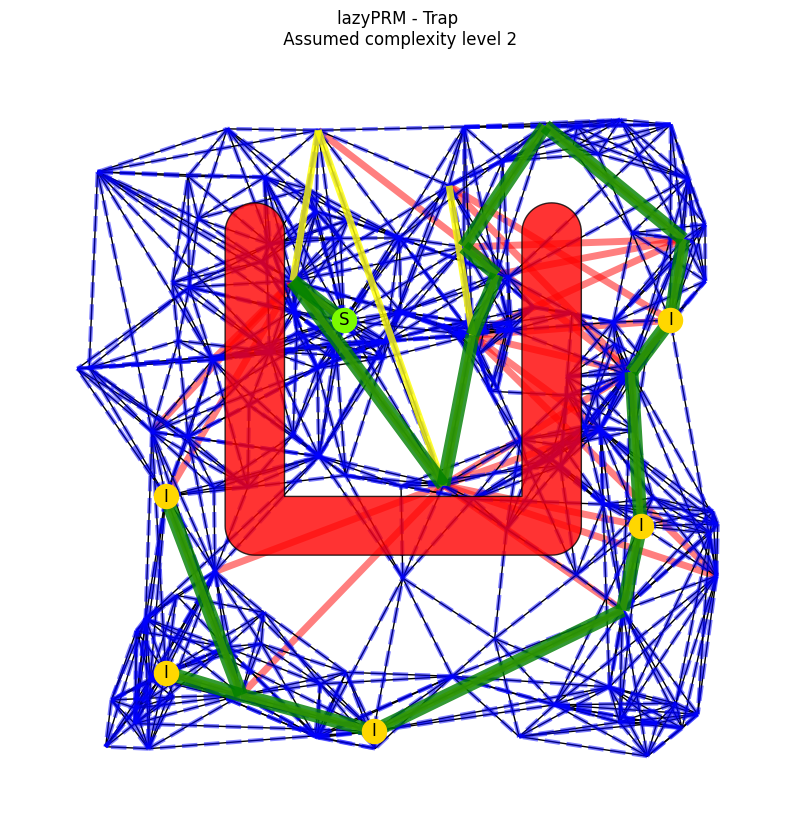

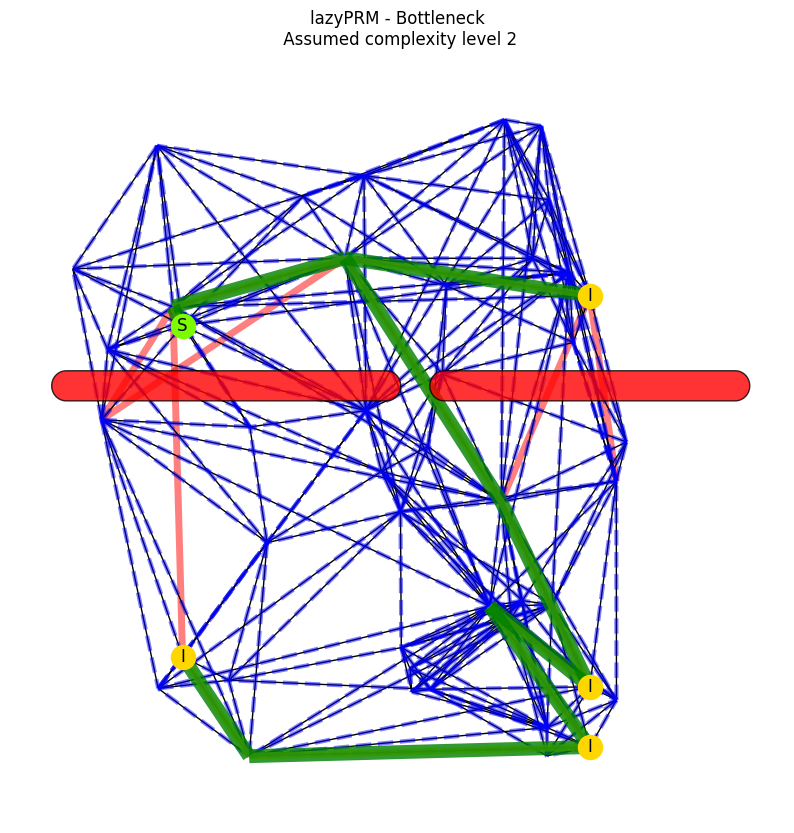

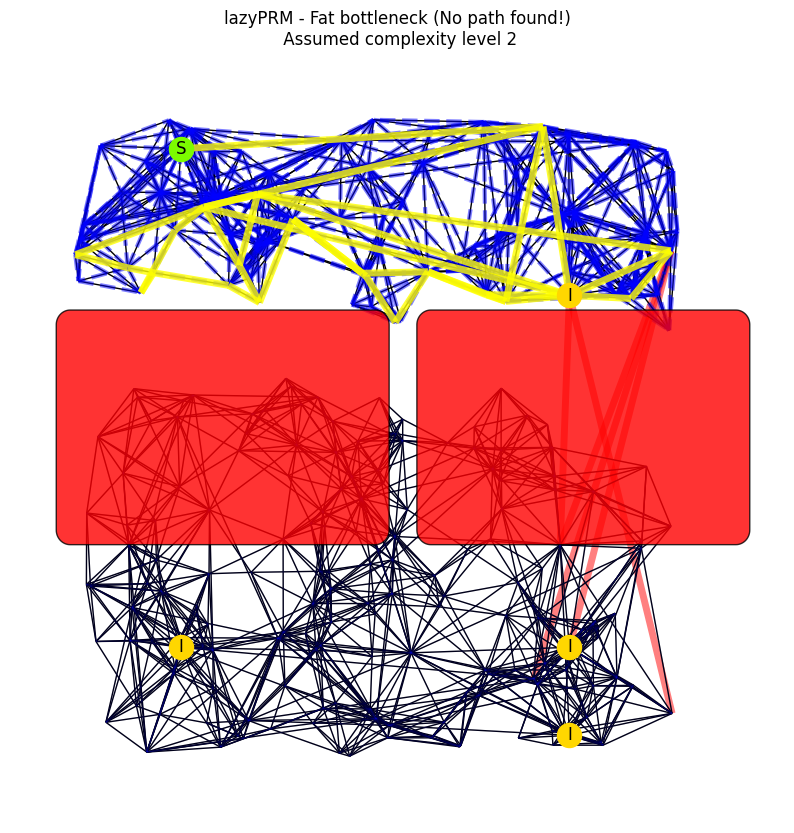

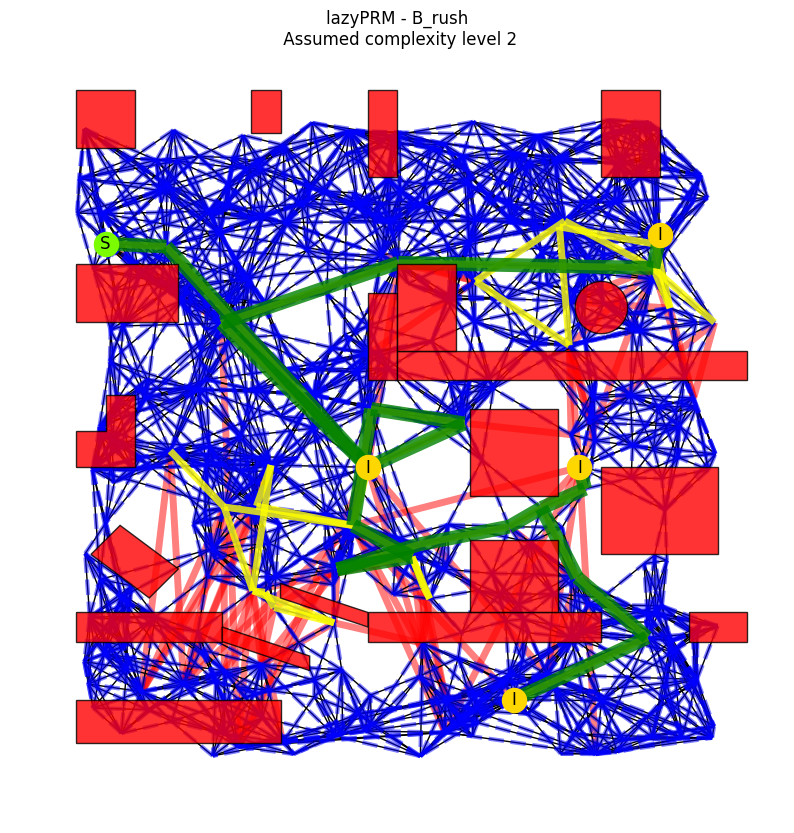

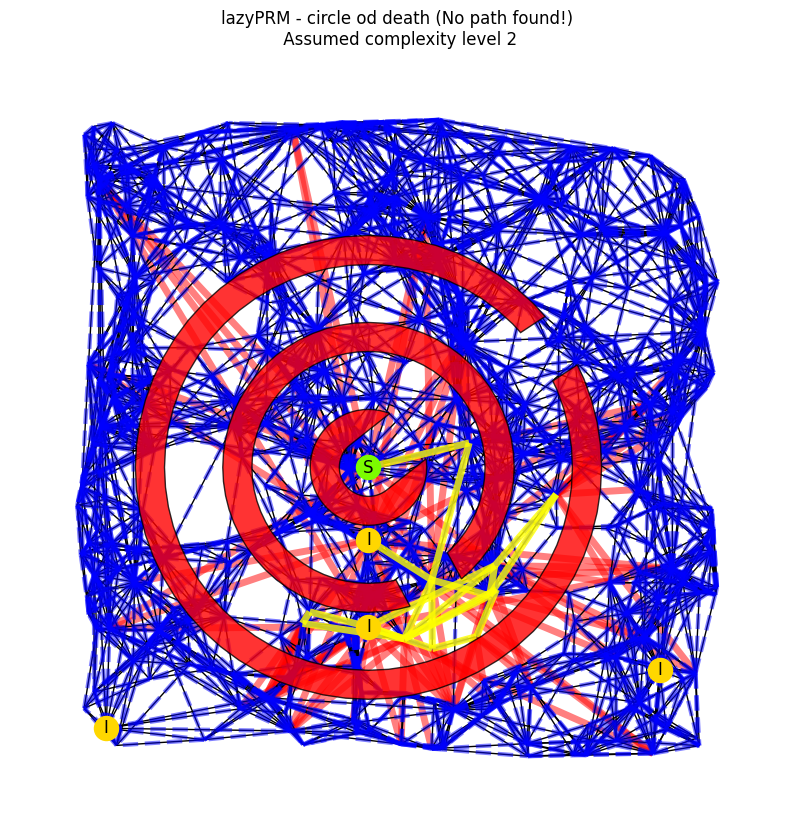

In [485]:
import matplotlib.pyplot as plt

for result in resultList:
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)


    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)


    except Exception as e:
        print ("Error")
        print(e)
        pass
    

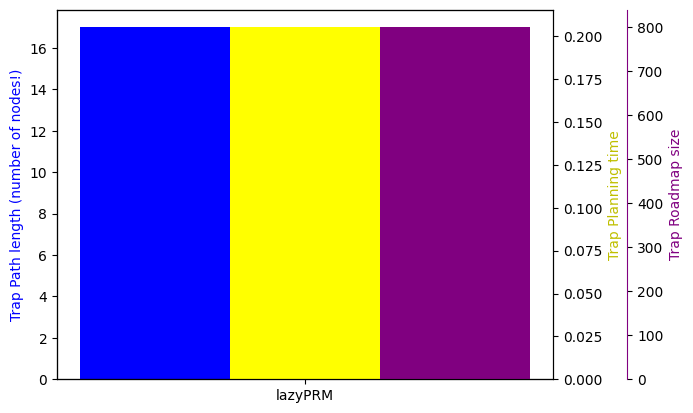

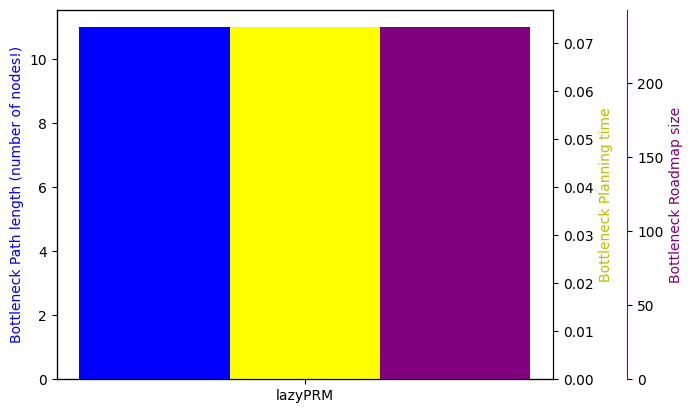

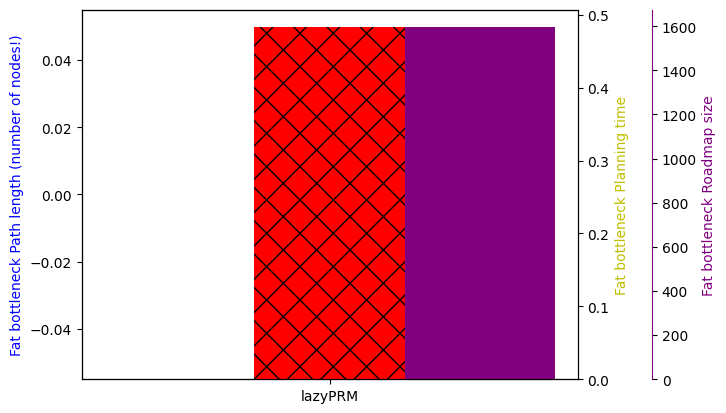

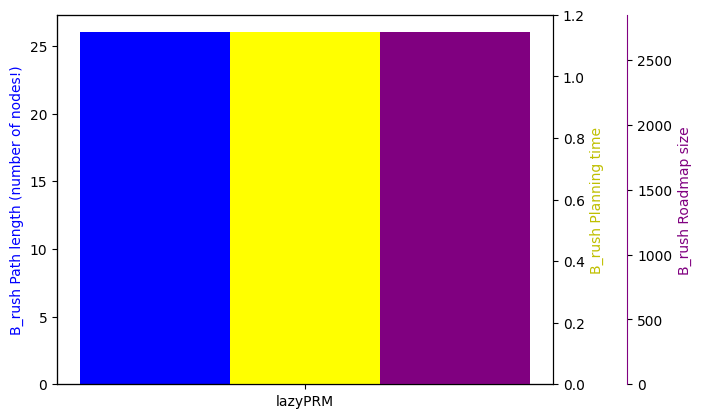

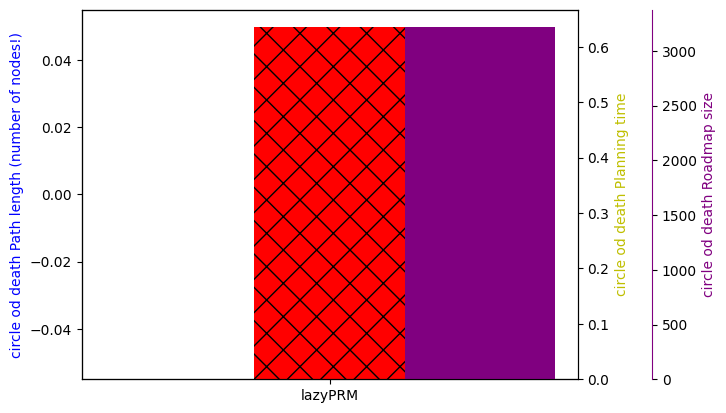

In [486]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [487]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

time
name                                 
_buildRoadmap                0.173648
_checkForCollisionAndUpdate  0.205868
_nearestInterim              0.003999
lineInCollision              0.156388
planRoundPath                0.635099
pointInCollision             0.177778

In [488]:
resultBasic = resultList[:5]
resultVisibility = resultList[5:10]
resultLazy = resultList[10:]

In [489]:
resultBasic[0].perfDataFrame

name  \
0                pointInCollision   
1                pointInCollision   
2                pointInCollision   
3                pointInCollision   
4                pointInCollision   
...                           ...   
1333  _checkForCollisionAndUpdate   
1334  _checkForCollisionAndUpdate   
1335  _checkForCollisionAndUpdate   
1336  _checkForCollisionAndUpdate   
1337                planRoundPath   

                                                   args kwargs  \
0     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
1     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
2     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
3     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
4     (<IPEnvironment.CollisionChecker object at 0x0...     {}   
...                                                 ...    ...   
1333  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
1334  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
1335  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
1336  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   
1337  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   

                                                 retVal      time  
0                                                 False  0.000000  
1                                                 False  0.000000  
2                                                 False  0.000000  
3                                                 False  0.000000  
4                                                 False  0.000000  
...                                                 ...       ...  
1333                                              False  0.001000  
1334                                              False  0.001002  
1335                                              False  0.000998  
1336                                              False  0.000999  
1337  [start, 8, 6, 7, 19, 13, 32, 20, interim3, 3, ...  0.205193  

[1338 rows x 5 columns]

In [490]:
for i in range(len(resultBasic)):
    print(resultBasic[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())

time    0.356162
dtype: float64
time    0.135402
dtype: float64
time    0.826421
dtype: float64
time    3.10808
dtype: float64
time    1.35278
dtype: float64


In [491]:
for i in range(len(resultVisibility)):

    print(resultVisibility[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [492]:
for i in range(len(resultLazy)):

    print(resultLazy[i].perfDataFrame.groupby(["name"]).sum(numeric_only=True).sum())


In [493]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_5664\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0

In [494]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

name                                               args kwargs  \
2650  planRoundPath  (<IPLazyPRM_Roundtrip.LazyPRM object at 0x0000...     {}   

     retVal      time  
2650     []  0.635099

In [495]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_5664\2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0